# Credit Card Users Churn Prediction

## Background & Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

You need to identify the best possible model that will give the required performance

## Objective

1. Explore and visualize the dataset.
2. Build a classification model to predict if the customer is going to churn or not
3. Optimize the model using appropriate techniques
4. Generate a set of insights and recommendations that will help the bank

### Data Dictionary:

- CLIENTNUM: Client number. Unique identifier for the customer holding the account
- Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
- Customer_Age: Age in Years
- Gender: Gender of the account holder
- Dependent_count: Number of dependents
- Education_Level:  Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to a college student), Post-Graduate, Doctorate.
- Marital_Status: Marital Status of the account holder
- Income_Category: Annual Income Category of the account holder
- Card_Category: Type of Card
- Months_on_book: Period of relationship with the bank
- Total_Relationship_Count: Total no. of products held by the customer
- Months_Inactive_12_mon: No. of months inactive in the last 12 months
- Contacts_Count_12_mon: No. of Contacts between the customer and bank in the last 12 months
- Credit_Limit: Credit Limit on the Credit Card
- Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance
- Avg_Open_To_Buy: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)
- Total_Trans_Amt: Total Transaction Amount (Last 12 months)
- Total_Trans_Ct: Total Transaction Count (Last 12 months)
- Total_Ct_Chng_Q4_Q1: Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter
- Total_Amt_Chng_Q4_Q1: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter
- Avg_Utilization_Ratio: Represents how much of the available credit the customer spent

## Import Libraries

In [1]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,)
from xgboost import XGBClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for tuning the model
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_randFloat


# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

# This will help in making the Python code more structured automatically (good coding practice)
!pip install nb_black

# To calculate the computational time of each model
from time import time

# To help with Over and Under sampling 
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [2]:
# Load the data into pandas dataframe
data = pd.read_csv("BankChurners.csv")

# Make another copy of data
df = data.copy()

### Observe Dataset

In [3]:
df.shape

(10127, 21)

10127 observations, 21 features

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

- There are 5 object variables including Attrition_Flag which is our target variable
- Education_Level and Marital_Status appear to be missing some values

In [5]:
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School            NaN  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3     12691.000                  777        11914.000   
1                      2      8256.000                  864         7392.000   
2                      0      3418.000                    0         3418.000   
3                      1      3313.000                 2517          796.000   
4                      0      4716.000                    0         4716.000   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  
0                  0.061  
1                  0.105  
2                  0.000  
3                  0.760  
4                  0.000

- We will need to do some pre-processing of the data
- Our target variable Attrition_Flag needs to converted into 1/0
- Column names appear to be satisfactory
- CLIENTNUM is a unique identifier and therfore won't add any info for our analysis
- Income_Category values can be cleaned up

In [6]:
df.tail()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
10122        Graduate         Single     $40K - $60K          Blue   
10123             NaN       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate            NaN     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
10122              40                         3                       2   
10123              25                         4                       2   
10124              36                         5                       3   
10125              36                         4                       3   
10126              25                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
10122                      3      4003.000                 1851   
10123                      3      4277.000                 2186   
10124                      4      5409.000                    0   
10125                      3      5281.000                    0   
10126                      4     10388.000                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
10122         2152.000                 0.703            15476             117   
10123         2091.000                 0.804             8764              69   
10124         5409.000                 0.819            10291              60   
10125         5281.000                 0.535             8395              62   
10126         8427.000                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
10122                0.857                  0.462  
10123                0.683                  0.511  
10124                0.818                  0.000  
10125                0.722                  0.000  
10126                0.649                  0.189

- There is no summary row at the bottom of the dataset

In [7]:
# let's check for duplicate values in the data
data.duplicated().sum()

0

In [8]:
# check for missing values
df.isnull().sum()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

Missing values
- Education_Level             1519
- Marital_Status               749

In [9]:
# check for missing values using percentages
df.isnull().mean().apply(lambda x : 
                         '{:.2f}% Missing'.format(x * 100))

CLIENTNUM                    0.00% Missing
Attrition_Flag               0.00% Missing
Customer_Age                 0.00% Missing
Gender                       0.00% Missing
Dependent_count              0.00% Missing
Education_Level             15.00% Missing
Marital_Status               7.40% Missing
Income_Category              0.00% Missing
Card_Category                0.00% Missing
Months_on_book               0.00% Missing
Total_Relationship_Count     0.00% Missing
Months_Inactive_12_mon       0.00% Missing
Contacts_Count_12_mon        0.00% Missing
Credit_Limit                 0.00% Missing
Total_Revolving_Bal          0.00% Missing
Avg_Open_To_Buy              0.00% Missing
Total_Amt_Chng_Q4_Q1         0.00% Missing
Total_Trans_Amt              0.00% Missing
Total_Trans_Ct               0.00% Missing
Total_Ct_Chng_Q4_Q1          0.00% Missing
Avg_Utilization_Ratio        0.00% Missing
dtype: object

Missing values
- Education_Level             15.00% Missing
- Marital_Status               7.40% Missing

We will impute these values after splitting the data into train, validation, and test sets.

In [10]:
# Checking for the null value in the dataset
data.isna().sum()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

- Same results as missing values
- We will impute these values after splitting the data into train, validation, and test sets.

In [11]:
# Chcek the number of unique values in each column
data.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 6
Marital_Status                  3
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

- Attrition_Flag is our target variable and is binary classification

In [12]:
# A statistical summary of numerical variables
df.describe().transpose()

count          mean          std           min  \
CLIENTNUM                10127.000 739177606.334 36903783.450 708082083.000   
Customer_Age             10127.000        46.326        8.017        26.000   
Dependent_count          10127.000         2.346        1.299         0.000   
Months_on_book           10127.000        35.928        7.986        13.000   
Total_Relationship_Count 10127.000         3.813        1.554         1.000   
Months_Inactive_12_mon   10127.000         2.341        1.011         0.000   
Contacts_Count_12_mon    10127.000         2.455        1.106         0.000   
Credit_Limit             10127.000      8631.954     9088.777      1438.300   
Total_Revolving_Bal      10127.000      1162.814      814.987         0.000   
Avg_Open_To_Buy          10127.000      7469.140     9090.685         3.000   
Total_Amt_Chng_Q4_Q1     10127.000         0.760        0.219         0.000   
Total_Trans_Amt          10127.000      4404.086     3397.129       510.000   
Total_Trans_Ct           10127.000        64.859       23.473        10.000   
Total_Ct_Chng_Q4_Q1      10127.000         0.712        0.238         0.000   
Avg_Utilization_Ratio    10127.000         0.275        0.276         0.000   

                                   25%           50%           75%  \
CLIENTNUM                713036770.500 717926358.000 773143533.000   
Customer_Age                    41.000        46.000        52.000   
Dependent_count                  1.000         2.000         3.000   
Months_on_book                  31.000        36.000        40.000   
Total_Relationship_Count         3.000         4.000         5.000   
Months_Inactive_12_mon           2.000         2.000         3.000   
Contacts_Count_12_mon            2.000         2.000         3.000   
Credit_Limit                  2555.000      4549.000     11067.500   
Total_Revolving_Bal            359.000      1276.000      1784.000   
Avg_Open_To_Buy               1324.500      3474.000      9859.000   
Total_Amt_Chng_Q4_Q1             0.631         0.736         0.859   
Total_Trans_Amt               2155.500      3899.000      4741.000   
Total_Trans_Ct                  45.000        67.000        81.000   
Total_Ct_Chng_Q4_Q1              0.582         0.702         0.818   
Avg_Utilization_Ratio            0.023         0.176         0.503   

                                   max  
CLIENTNUM                828343083.000  
Customer_Age                    73.000  
Dependent_count                  5.000  
Months_on_book                  56.000  
Total_Relationship_Count         6.000  
Months_Inactive_12_mon           6.000  
Contacts_Count_12_mon            6.000  
Credit_Limit                 34516.000  
Total_Revolving_Bal           2517.000  
Avg_Open_To_Buy              34516.000  
Total_Amt_Chng_Q4_Q1             3.397  
Total_Trans_Amt              18484.000  
Total_Trans_Ct                 139.000  
Total_Ct_Chng_Q4_Q1              3.714  
Avg_Utilization_Ratio            0.999

- Customer_Age mean and median is very close to 46 indicating fairly normal distribution
- Dependent_count range frmo 1 to 5
- Months_on_book mean of 35.9 and median of 36 indicate normality
- Total_Relationship_Count has a range of 1 to 6
- Months_Inactive_12_mon has a min of 0 and max of 6
- Contacts_Count_12_mo has a min of 0 indicating no contact and max of 6 time contacted
- Credit_Limit	has wide varaiblity and likely some outliers
- Total_Revolving_Bal has a left skew with a min of 0 and max of 2517 indicating some potential outliers
- Avg_Open_To_Buy appears right skewed with a min of 0 and max of 34516 indicating some potential outliers
- Total_Amt_Chng_Q4_Q1 has a min of 0 and max of 3.39
- Total_Trans_Amt is right skewed with wide variability and likey outliers
- Total_Trans_Ct has wide varaiblity and likely outliers
- Total_Ct_Chng_Q4_Q1 has a min of 0 and max of 3.714
- Avg_Utilization_Ratio	is right skewed with a min of 0 and max of 0.999 indicating wide variablity and potential outliers

In [13]:
# let's view the statistical summary of the non-numerical columns in the data
df.describe(exclude=np.number).T

count unique                top  freq
Attrition_Flag   10127      2  Existing Customer  8500
Gender           10127      2                  F  5358
Education_Level   8608      6           Graduate  3128
Marital_Status    9378      3            Married  4687
Income_Category  10127      6     Less than $40K  3561
Card_Category    10127      4               Blue  9436



*  Female is most frequent gender
* Most customers identify as Graduate are Married adn report annual Income of <$40K
* Blue is most common credi card type 



### Fixing Datatypes

In [14]:
# Replace values of Income Category with more model friendly names

df['Income_Category'] = df['Income_Category'].replace(['Less than $40K'], 'less_than_$40K').replace(['$40K - $60K'], '$40K-$60K').replace(['$80K - $120K'], '$80K-$120K').replace(['$60K - $80K'], '$60K-$80K').replace(['$120K +'], 'more_than_$120K').replace(['abc'], 'Unknown')
                
df['Income_Category'].value_counts() 

less_than_$40K     3561
$40K-$60K          1790
$80K-$120K         1535
$60K-$80K          1402
Unknown            1112
more_than_$120K     727
Name: Income_Category, dtype: int64

In [15]:
# convert object variables to categories

df["Attrition_Flag"] = df["Attrition_Flag"].astype("category")
df["Marital_Status"] = df["Marital_Status"].astype("category")
df["Education_Level"] = df["Education_Level"].astype("category")
df["Income_Category"] = df["Income_Category"].astype("category")
df["Card_Category"] = df["Card_Category"].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CLIENTNUM                 10127 non-null  int64   
 1   Attrition_Flag            10127 non-null  category
 2   Customer_Age              10127 non-null  int64   
 3   Gender                    10127 non-null  object  
 4   Dependent_count           10127 non-null  int64   
 5   Education_Level           8608 non-null   category
 6   Marital_Status            9378 non-null   category
 7   Income_Category           10127 non-null  category
 8   Card_Category             10127 non-null  category
 9   Months_on_book            10127 non-null  int64   
 10  Total_Relationship_Count  10127 non-null  int64   
 11  Months_Inactive_12_mon    10127 non-null  int64   
 12  Contacts_Count_12_mon     10127 non-null  int64   
 13  Credit_Limit              10127 non-null  floa

In [16]:
# Making a list of all catergorical variables
cat_col = [
    "Attrition_Flag",
    "Education_Level",
    "Marital_Status",
    "Income_Category",
    "Card_Category"]

# Printing number of count of each unique value in each column
for column in cat_col:
    print(df[column].value_counts())
    print("-" * 40)

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
----------------------------------------
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
----------------------------------------
Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64
----------------------------------------
less_than_$40K     3561
$40K-$60K          1790
$80K-$120K         1535
$60K-$80K          1402
Unknown            1112
more_than_$120K     727
Name: Income_Category, dtype: int64
----------------------------------------
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64
----------------------------------------


- We have an imbalance in our target variable only 16% are Attrited
- There are more lower educated customers than those with College or higher education
- Most of our customers are Married
- Income_Category appears to have an anomoly value of "abc" which will need to fixed after we split the datasets
- Blue is by far the most common Card_Category type

In [17]:
#Dropping CLIENTNUM column
df.drop(columns='CLIENTNUM',inplace=True)

In [18]:
# Create new target variable numeric column CC_Churn

df['CC_Churn'] = df['Attrition_Flag'].replace(['Existing Customer'], '0').replace(['Attrited Customer'], '1')
df["CC_Churn"] = df["CC_Churn"].astype("int64")
df['CC_Churn'].value_counts() 

0    8500
1    1627
Name: CC_Churn, dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  object  
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           8608 non-null   category
 5   Marital_Status            9378 non-null   category
 6   Income_Category           10127 non-null  category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  int64   
 10  Months_Inactive_12_mon    10127 non-null  int64   
 11  Contacts_Count_12_mon     10127 non-null  int64   
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

## Exploratory Data Analysis

###  Univariate Analysis

In [20]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

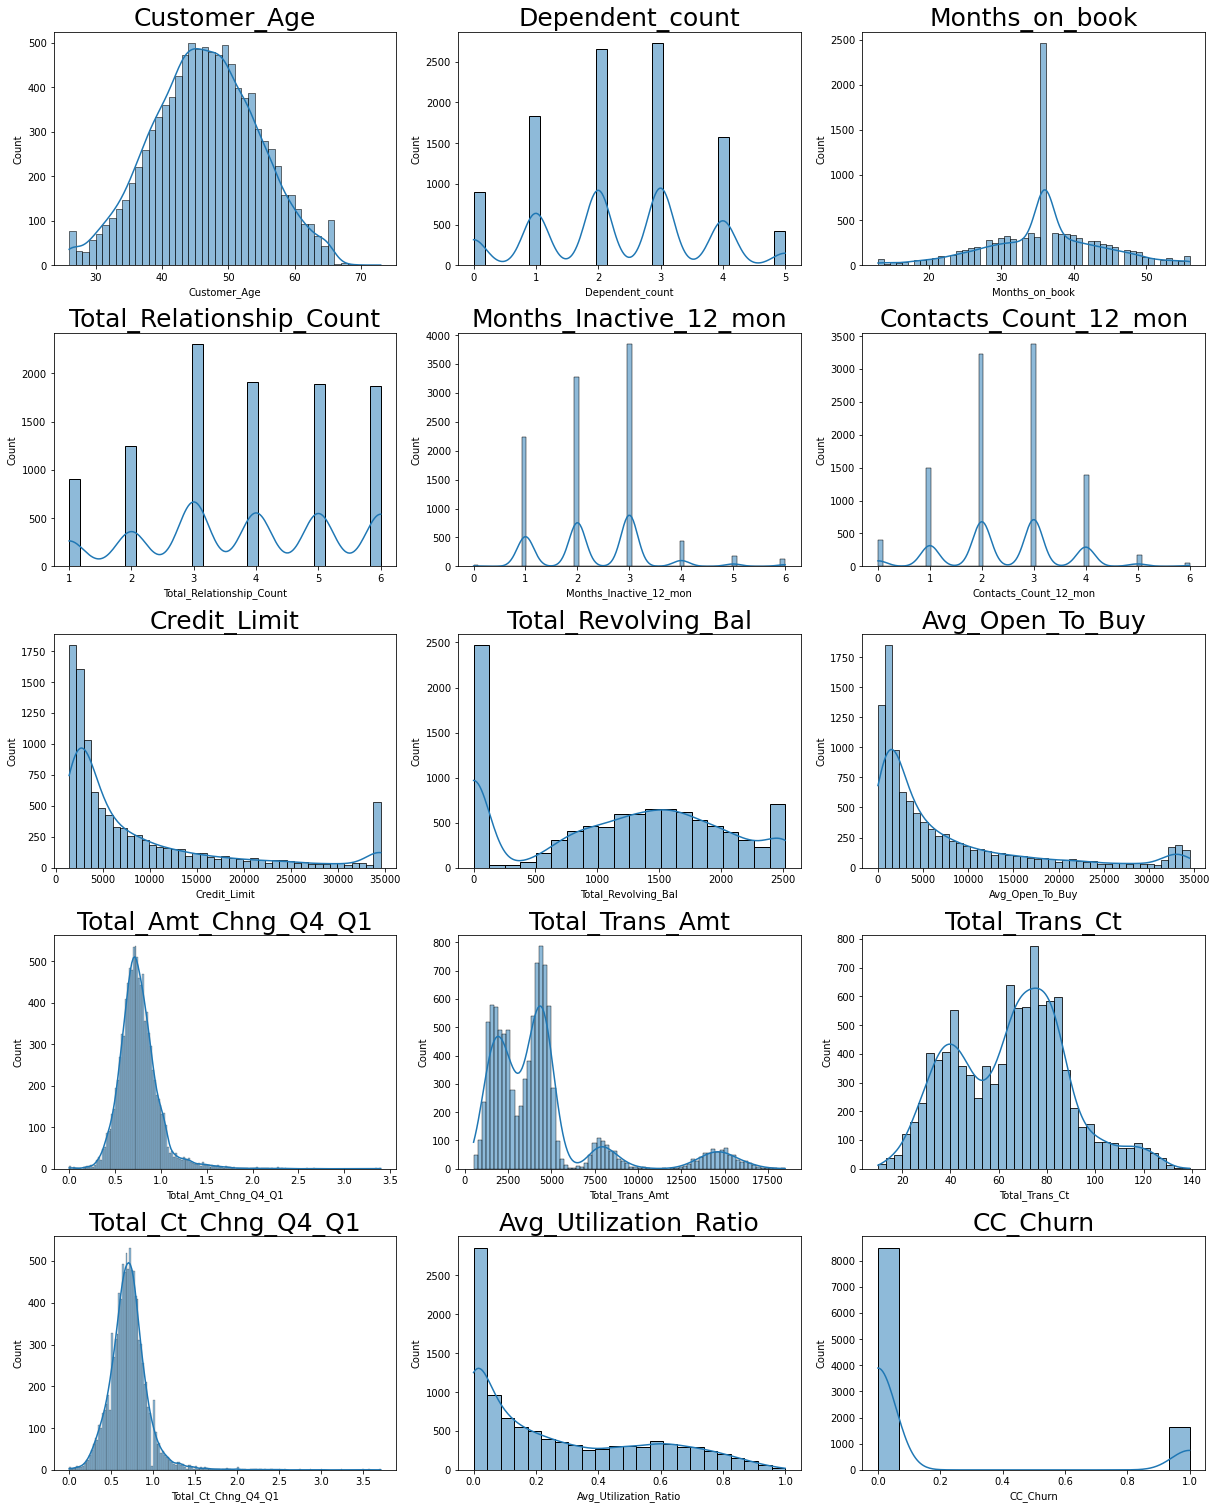

In [21]:
# lets plot histogram of all numerical variables to check for normality vs. skewness

all_col = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(17, 75))

for i in range(len(all_col)):
    plt.subplot(18, 3, i + 1)
    #plt.hist(data[all_col[i]])
    sns.histplot(df[all_col[i]], kde=True)  # you can comment the previous line and run this one to get distribution curves
    plt.tight_layout()
    plt.title(all_col[i], fontsize=25)

plt.show()

### Observe Age

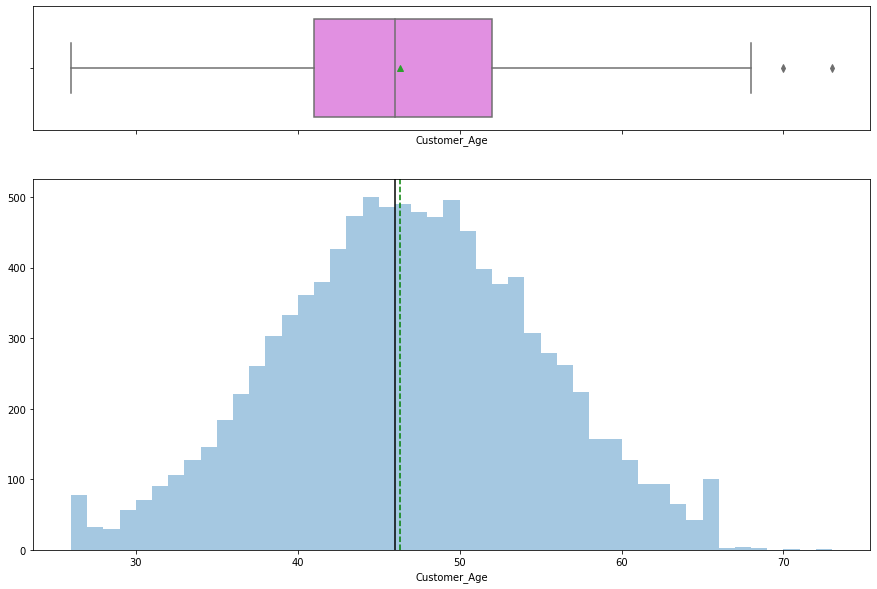

In [22]:
histogram_boxplot(df.Customer_Age)

- a few outliers but given the distribution curve and number of observations this should not materially impact the model

In [23]:
df[df["Customer_Age"] > 65]

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
39   Attrited Customer            66      F                0       Doctorate   
52   Existing Customer            66      F                0     High School   
151  Existing Customer            68      M                1        Graduate   
177  Existing Customer            67      F                1        Graduate   
198  Attrited Customer            68      M                0     High School   
251  Existing Customer            73      M                0     High School   
254  Existing Customer            70      M                0     High School   
320  Existing Customer            67      M                0        Graduate   
410  Existing Customer            67      M                1      Uneducated   
432  Existing Customer            67      F                0             NaN   

    Marital_Status Income_Category Card_Category  Months_on_book  \
39         Married         Unknown          Blue              56   
52         Married  less_than_$40K          Blue              54   
151        Married         Unknown          Blue              56   
177        Married  less_than_$40K          Blue              56   
198        Married  less_than_$40K          Blue              52   
251        Married       $40K-$60K          Blue              36   
254        Married  less_than_$40K          Blue              56   
320        Married       $40K-$60K          Blue              56   
410        Married       $40K-$60K          Blue              49   
432        Married         Unknown          Blue              56   

     Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
39                          5                       4                      3   
52                          3                       4                      2   
151                         5                       2                      3   
177                         4                       3                      2   
198                         1                       3                      2   
251                         5                       3                      2   
254                         3                       2                      3   
320                         4                       2                      1   
410                         4                       3                      2   
432                         4                       3                      3   

     Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
39       7882.000                  605         7277.000                 1.052   
52       3171.000                 2179          992.000                 1.224   
151     13860.000                 1652        12208.000                 1.255   
177      3006.000                 2517          489.000                 2.053   
198      1438.300                  900          538.300                 0.743   
251      4469.000                 1125         3344.000                 1.363   
254      3252.000                 1495         1757.000                 0.581   
320      5876.000                 1297         4579.000                 1.012   
410      3106.000                 1675         1431.000                 0.781   
432     10509.000                 2388         8121.000                 0.777   

     Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
39               704              16                0.143   
52              1946              38                1.923   
151             1910              32                1.909   
177             1661              32                1.000   
198              760              21                0.615   
251             1765              34                1.615   
254             1227              15                0.875   
320             2133              55                0.719   
410             1512              38                0.40

- There are 10 observation with Age > 65 but this represents market conditions and will be kept in the dataset

### Observe Months_on_book

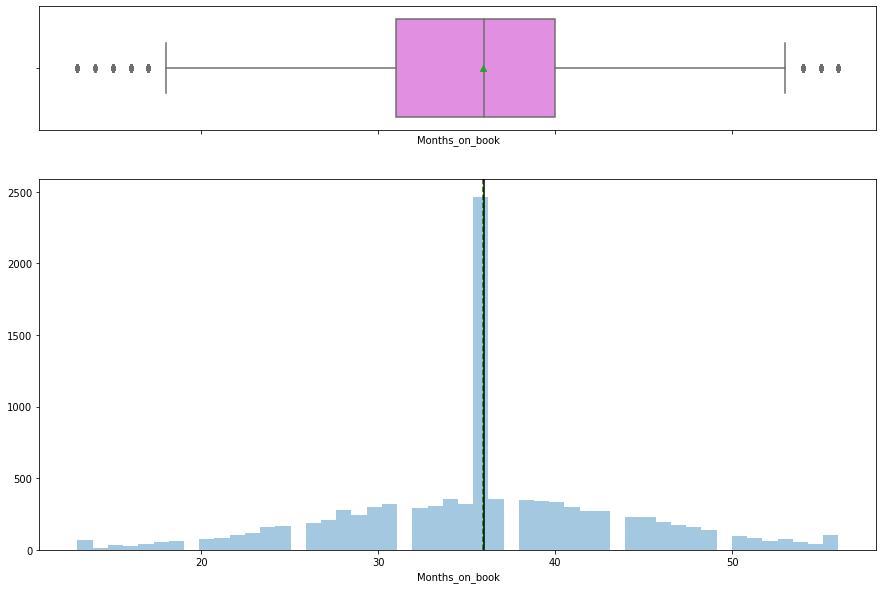

In [24]:
histogram_boxplot(df.Months_on_book)

In [25]:
df['Months_on_book'].value_counts() 

36    2463
37     358
34     353
38     347
39     341
40     333
31     318
35     317
33     305
30     300
41     297
32     289
28     275
43     273
42     271
29     241
44     230
45     227
27     206
46     197
26     186
47     171
25     165
48     162
24     160
49     141
23     116
22     105
56     103
50      96
21      83
51      80
53      78
20      74
13      70
19      63
52      62
18      58
54      53
55      42
17      39
15      34
16      29
14      16
Name: Months_on_book, dtype: int64

- Outliers at both ends of the range but a strong central tendency around 36


### Observe Credit_Limit

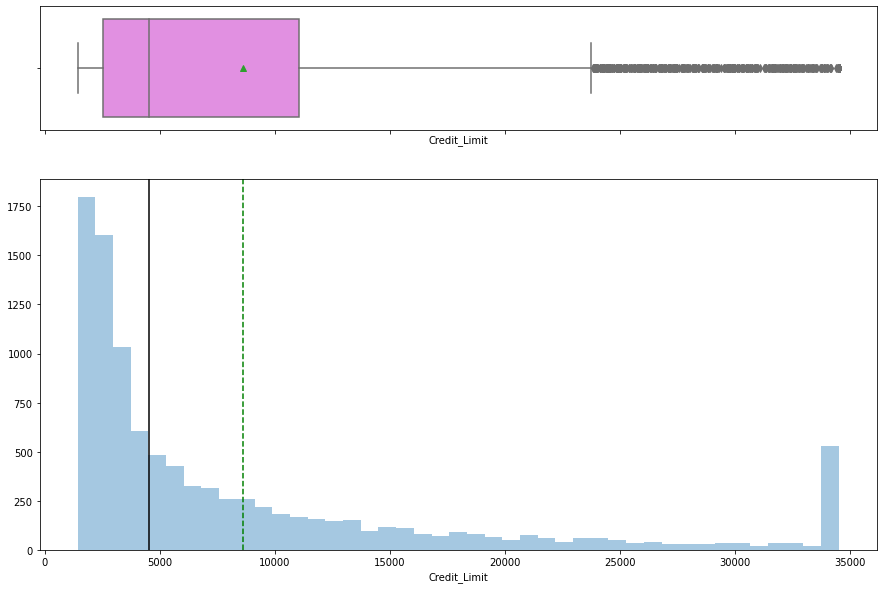

In [26]:
histogram_boxplot(df.Credit_Limit)

- Long tail to the right
- We will try a log tranformation to see if we can reduce skewness


In [27]:
df[df["Credit_Limit"] > 30000]

Attrition_Flag  Customer_Age Gender  Dependent_count  \
6      Existing Customer            51      M                4   
16     Existing Customer            48      M                4   
40     Existing Customer            45      M                3   
45     Existing Customer            49      M                4   
61     Attrited Customer            48      M                2   
...                  ...           ...    ...              ...   
10088  Existing Customer            45      M                2   
10095  Existing Customer            46      M                3   
10098  Attrited Customer            55      M                3   
10110  Existing Customer            56      M                1   
10112  Attrited Customer            33      M                2   

      Education_Level Marital_Status  Income_Category Card_Category  \
6                 NaN        Married  more_than_$120K          Gold   
16      Post-Graduate         Single       $80K-$120K          Blue   
40           Graduate         Single       $80K-$120K          Blue   
45         Uneducated         Single       $80K-$120K          Blue   
61           Graduate        Married        $60K-$80K        Silver   
...               ...            ...              ...           ...   
10088        Graduate         Single        $60K-$80K        Silver   
10095             NaN        Married       $80K-$120K          Blue   
10098        Graduate         Single  more_than_$120K        Silver   
10110        Graduate         Single       $80K-$120K        Silver   
10112         College        Married  more_than_$120K          Gold   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
6                  46                         6                       1   
16                 36                         6                       2   
40                 41                         2                       2   
45                 30                         3                       2   
61                 35                         2                       4   
...               ...                       ...                     ...   
10088              33                         4                       2   
10095              33                         4                       1   
10098              36                         4                       3   
10110              49                         5                       2   
10112              20                         2                       1   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
6                          3     34516.000                 2264   
16                         3     30367.000                 2362   
40                         2     32426.000                  578   
45                         3     34516.000                    0   
61                         4     34516.000                    0   
...                      ...           ...                  ...   
10088                      2     34516.000                 1529   
10095                      3     34516.000                 1099   
10098                      4     34516.000                    0   
10110                      2     34516.000                 1091   
10112                      4     34516.000                    0   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
6            32252.000                 1.975             1330              31   
16           28005.000                 1.708             1671              27   
40           31848.000                 1.042             1109              28   
45           34516.000                 1.621             1444              28   
61           34516.000                 0.763              691              15   
...                ...                   ...              ...             ...   
10088        32987.000                 0.609            13940             105   
10095     

- There are 20 observations with credit limit > 30000 but we will not cap as this represents accurate market dynamics

### Observe Total_Revolving_Bal

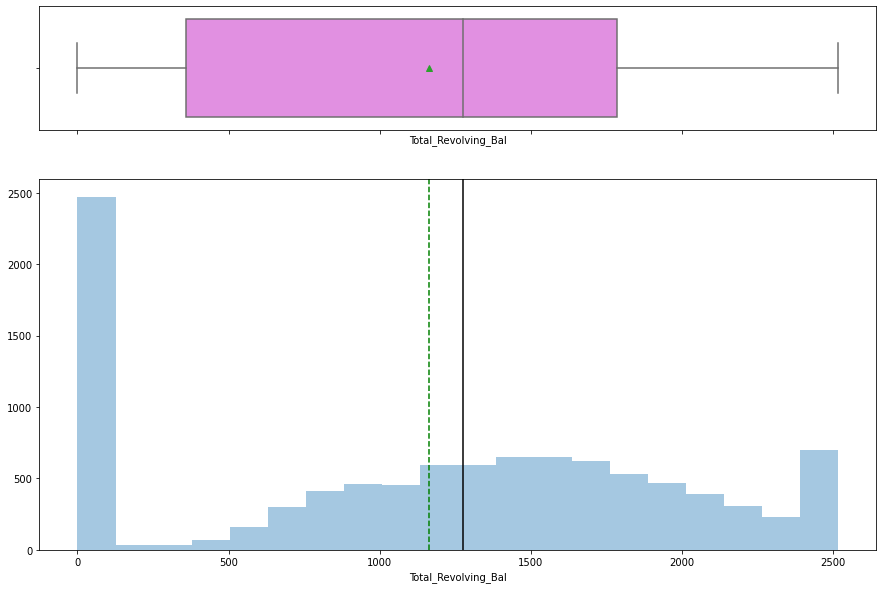

In [28]:
histogram_boxplot(df.Total_Revolving_Bal)

- Slight right tail skewness with mode at 0


### Observe Avg_Open_To_Buy

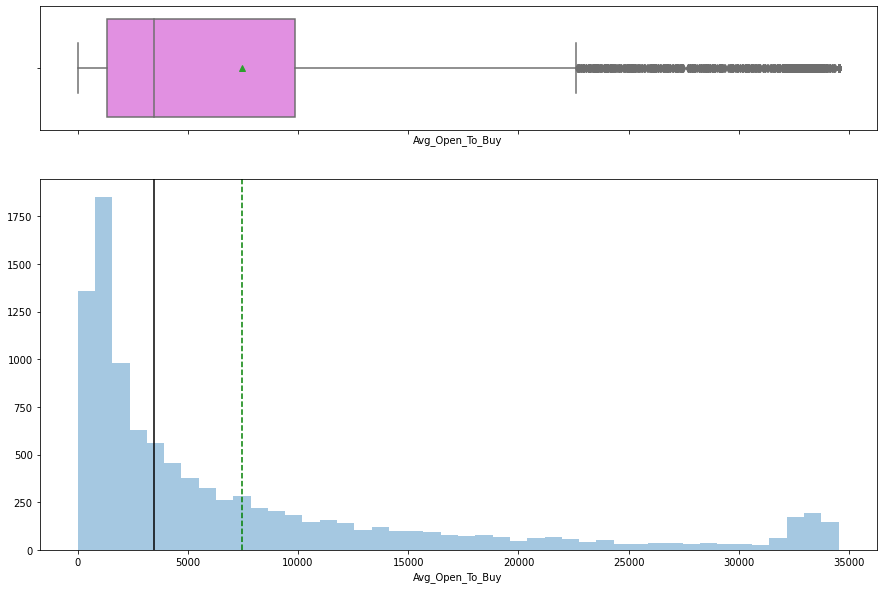

In [29]:
histogram_boxplot(df.Avg_Open_To_Buy)

- Long tail to the right
- We will not clip as this represents market trend

### Observe Total_Amt_Chng_Q4_Q1

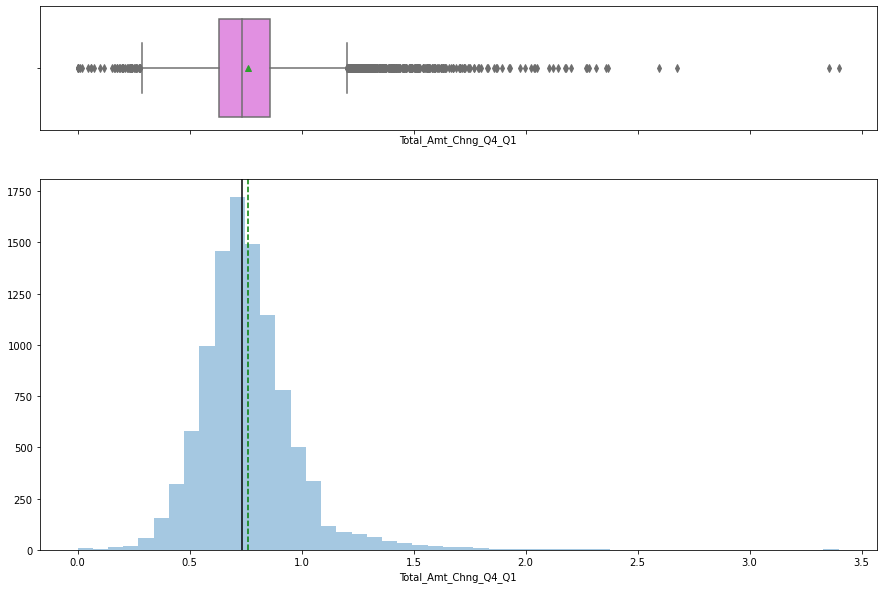

In [30]:
histogram_boxplot(df.Total_Amt_Chng_Q4_Q1)

- Total_Amt_Chng_Q4_Q1 data is close to normal but with many outliers

In [31]:
df[df["Total_Amt_Chng_Q4_Q1"] > 2.0]

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
2     Existing Customer            51      M                3        Graduate   
4     Existing Customer            40      M                3      Uneducated   
7     Existing Customer            32      M                0     High School   
8     Existing Customer            37      M                3      Uneducated   
12    Existing Customer            56      M                1         College   
46    Existing Customer            56      M                2       Doctorate   
47    Existing Customer            59      M                1       Doctorate   
58    Existing Customer            44      F                5        Graduate   
154   Existing Customer            53      F                1         College   
177   Existing Customer            67      F                1        Graduate   
219   Existing Customer            44      F                3      Uneducated   
284   Existing Customer            61      M                0        Graduate   
431   Existing Customer            47      F                4             NaN   
466   Existing Customer            63      M                2        Graduate   
658   Existing Customer            46      M                4        Graduate   
773   Existing Customer            61      M                0   Post-Graduate   
841   Existing Customer            37      F                3             NaN   
1085  Existing Customer            45      F                3        Graduate   
1219  Existing Customer            38      F                4        Graduate   
1873  Existing Customer            38      M                3      Uneducated   

     Marital_Status Income_Category Card_Category  Months_on_book  \
2           Married      $80K-$120K          Blue              36   
4           Married       $60K-$80K          Blue              21   
7               NaN       $60K-$80K        Silver              27   
8            Single       $60K-$80K          Blue              36   
12           Single      $80K-$120K          Blue              36   
46          Married       $60K-$80K          Blue              45   
47          Married       $40K-$60K          Blue              52   
58          Married         Unknown          Blue              35   
154         Married  less_than_$40K          Blue              47   
177         Married  less_than_$40K          Blue              56   
219        Divorced  less_than_$40K        Silver              38   
284         Married       $40K-$60K          Blue              52   
431        Divorced       $40K-$60K          Blue              34   
466         Married       $60K-$80K          Blue              49   
658         Married       $60K-$80K          Blue              35   
773         Married         Unknown          Blue              53   
841         Married  less_than_$40K          Blue              25   
1085         Single         Unknown          Blue              36   
1219        Married         Unknown          Blue              28   
1873        Married       $60K-$80K          Blue              36   

      Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
2                            4                       1                      0   
4                            5                       1                      0   
7                            2                       2                      2   
8                            5                       2                      0   
12                           3                       6                      0   
46                           6                       2                      0   
47                           3                       2                      2   
58                           4                       1                      2   
154                          4                       2                      3   
177                          4                 

- Outliers seem to be within market trend therefore will not cap

- We will cap at 2.5 as there are four which could be abnormal outliers

### Observe Total_Trans_Amt

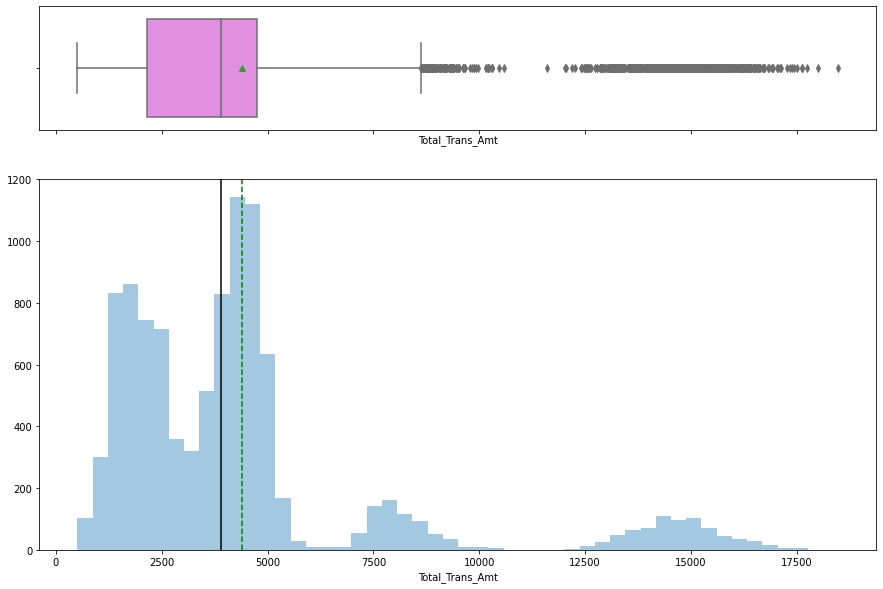

In [32]:
histogram_boxplot(df.Total_Trans_Amt)

- Long tail to the right
- May try a log tranformation to see if we can reduce skewness
- Will not clip as values do not seem unreasonable but market trend


### Observe Total_Trans_Ct

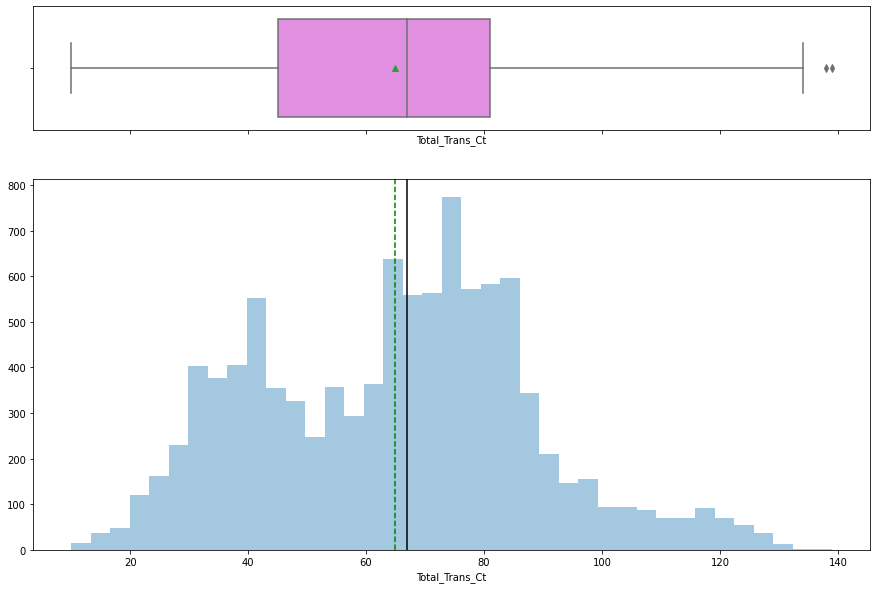

In [33]:
histogram_boxplot(df.Total_Trans_Ct)

In [34]:
df[df["Total_Trans_Ct"] > 130]

Attrition_Flag  Customer_Age Gender  Dependent_count  \
9213   Existing Customer            32      M                1   
9261   Existing Customer            46      F                4   
9269   Existing Customer            35      M                3   
9324   Existing Customer            41      M                3   
9339   Existing Customer            27      F                0   
9586   Existing Customer            56      F                1   
9629   Existing Customer            42      M                2   
9728   Existing Customer            46      M                2   
9841   Existing Customer            50      M                3   
10085  Existing Customer            49      M                3   

      Education_Level Marital_Status  Income_Category Card_Category  \
9213       Uneducated         Single        $60K-$80K        Silver   
9261              NaN         Single   less_than_$40K          Blue   
9269      High School        Married        $40K-$60K          Blue   
9324              NaN        Married  more_than_$120K          Blue   
9339         Graduate            NaN   less_than_$40K          Blue   
9586      High School        Married          Unknown          Blue   
9629         Graduate         Single        $60K-$80K        Silver   
9728         Graduate         Single  more_than_$120K          Blue   
9841         Graduate        Married  more_than_$120K          Blue   
10085      Uneducated        Married  more_than_$120K          Gold   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
9213               36                         2                       3   
9261               36                         2                       1   
9269               27                         1                       2   
9324               33                         2                       4   
9339               36                         1                       1   
9586               49                         1                       2   
9629               36                         3                       3   
9728               28                         1                       1   
9841               41                         4                       2   
10085              38                         4                       3   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
9213                       1     33711.000                 1437   
9261                       2      3973.000                    0   
9269                       3     14382.000                 1950   
9324                       3     34516.000                  638   
9339                       2      4548.000                 1450   
9586                       1     17542.000                 2517   
9629                       2     34516.000                    0   
9728                       1      7790.000                 1921   
9841                       3     34516.000                 2253   
10085                      4     14938.000                    0   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
9213         32274.000                 0.942            14880             134   
9261          3973.000                 0.890            13740             131   
9269         12432.000                 0.578            12941             131   
9324         33878.000                 0.724            13085             139   
9339          3098.000                 0.844            14330             131   
9586         15025.000                 0.800            13939             138   
9629         34516.000                 0.774            12920             132   
9728          5869.000                 0.789            14567             131   
9841         32263.000                 1.032            16692             131   
10085        14938.000                 0.737            15277             131   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_R

- Long tail to the right
- There are 10 records with Total_Trans_Ct > 130 but we will not clip as this does not seem to be anomalies
- We will try a log tranformation to see if we can reduce skewness

### Observe Total_Ct_Chng_Q4_Q1

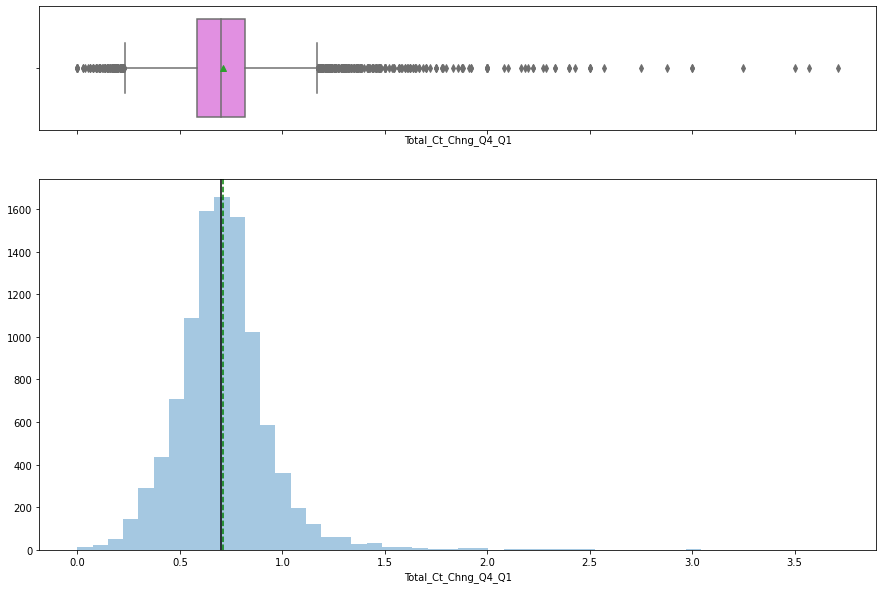

In [35]:
histogram_boxplot(df.Total_Ct_Chng_Q4_Q1)

In [36]:
df[df["Total_Ct_Chng_Q4_Q1"] > 2.0]

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
1     Existing Customer            49      F                5        Graduate   
2     Existing Customer            51      M                3        Graduate   
3     Existing Customer            40      F                4     High School   
4     Existing Customer            40      M                3      Uneducated   
12    Existing Customer            56      M                1         College   
30    Existing Customer            53      M                3             NaN   
68    Existing Customer            49      M                2        Graduate   
91    Existing Customer            49      M                4     High School   
113   Existing Customer            54      F                0      Uneducated   
131   Existing Customer            43      M                4             NaN   
146   Existing Customer            41      F                2        Graduate   
158   Existing Customer            44      F                2      Uneducated   
162   Existing Customer            46      M                1      Uneducated   
167   Existing Customer            58      F                4      Uneducated   
190   Existing Customer            57      M                1        Graduate   
239   Existing Customer            44      M                4             NaN   
269   Existing Customer            54      M                5        Graduate   
280   Existing Customer            43      M                1        Graduate   
294   Existing Customer            45      M                2         College   
309   Existing Customer            43      F                4      Uneducated   
366   Existing Customer            36      F                4        Graduate   
757   Attrited Customer            43      M                2      Uneducated   
773   Existing Customer            61      M                0   Post-Graduate   
805   Existing Customer            29      M                0   Post-Graduate   
1095  Existing Customer            54      F                3       Doctorate   
2510  Attrited Customer            54      M                3     High School   

     Marital_Status Income_Category Card_Category  Months_on_book  \
1            Single  less_than_$40K          Blue              44   
2           Married      $80K-$120K          Blue              36   
3               NaN  less_than_$40K          Blue              34   
4           Married       $60K-$80K          Blue              21   
12           Single      $80K-$120K          Blue              36   
30          Married      $80K-$120K          Blue              33   
68          Married       $60K-$80K          Blue              32   
91           Single      $80K-$120K          Blue              38   
113         Married  less_than_$40K          Blue              36   
131         Married       $40K-$60K          Blue              39   
146          Single  less_than_$40K          Blue              32   
158         Married         Unknown        Silver              35   
162         Married       $60K-$80K          Blue              36   
167         Married  less_than_$40K          Blue              47   
190         Married      $80K-$120K          Blue              47   
239          Single      $80K-$120K          Blue              34   
269         Married       $60K-$80K          Blue              38   
280          Single      $80K-$120K        Silver              37   
294          Single       $60K-$80K          Blue              33   
309         Married  less_than_$40K          Blue              36   
366         Married       $40K-$60K          Blue              36   
757         Married       $60K-$80K          Blue              24   
773         Married         Unknown          Blue              53   
805          Single       $40K-$60K          Blue              19   
1095        Married       $40K-$60K          Blue              39   
2510        Married       $

In [37]:
# Capping values for Total_Ct_Chng_Q4_Q1 at 2.0
#df["Total_Ct_Chng_Q4_Q1"].clip(upper=2.0, inplace=True)

- Total_Ct_Chng_Q4_Q1 data seems normal but with many outliers
- Outliers seem to be within market trend therefore will not cap

Observe Avg_Utilization_Ratio

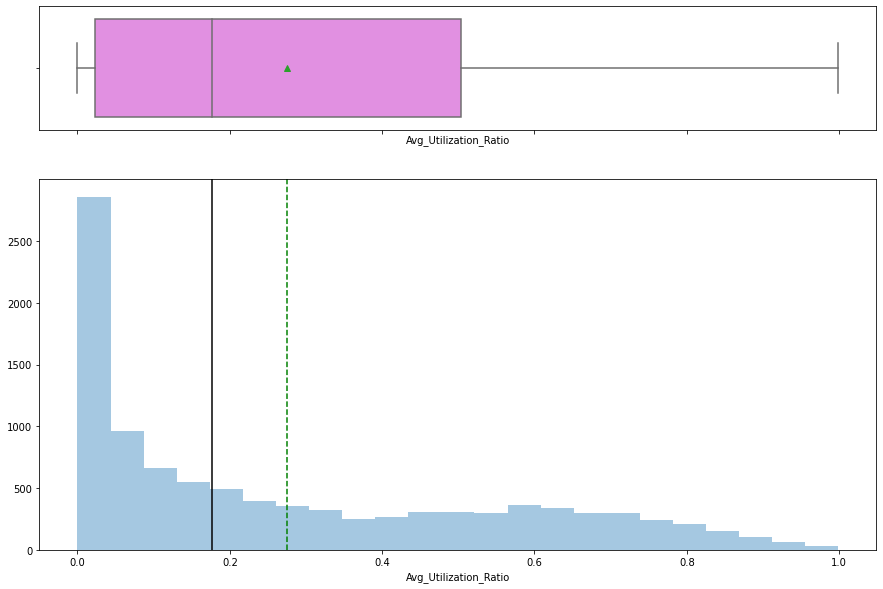

In [38]:
histogram_boxplot(df.Avg_Utilization_Ratio)

- Long tail to the right but does not seem unusual


In [39]:
def perc_on_bar(feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    #Creating a countplot for the feature
    sns.set(rc={'figure.figsize':(15,7)})
    ax=sns.countplot(x=feature, data=data)
    
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.25 # width of the plot
        y = p.get_y() + p.get_height()           # height of the plot
        ax.annotate(percentage, (x, y), size = 14) # annotate the percantage 
        
    plt.show() # show the plot

### Observe Attrition_Flag
- Dependent Variable

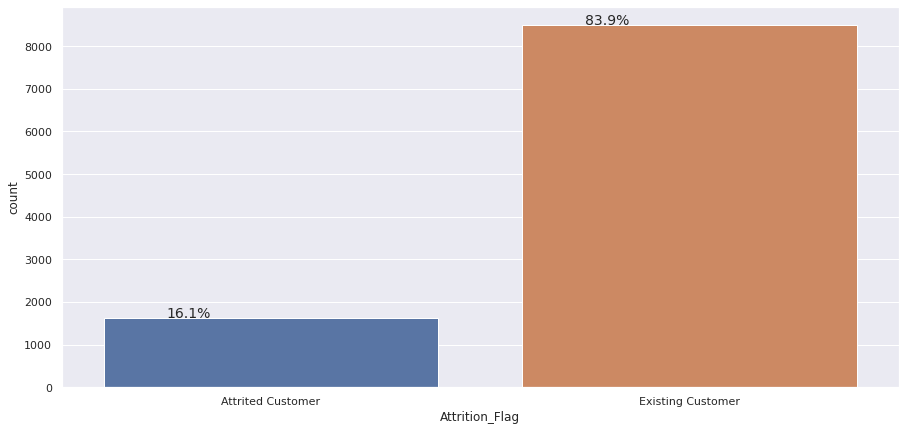

In [40]:
perc_on_bar(df['Attrition_Flag'])

- Target variable is unbalanced as expected in these cases

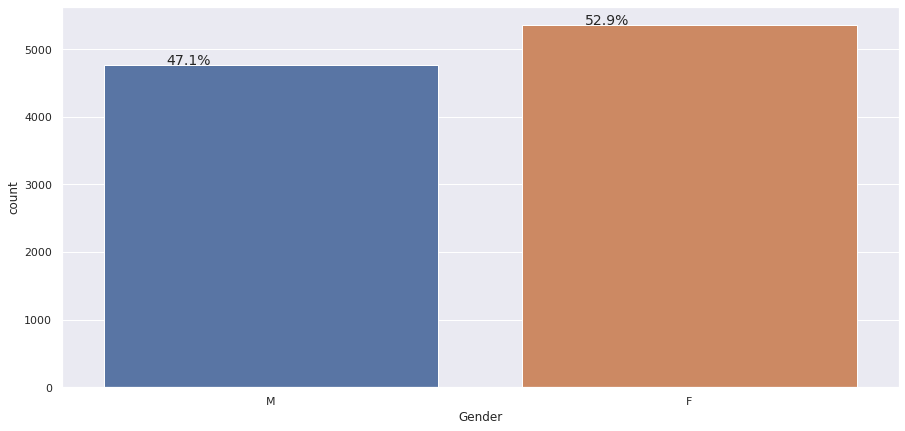

In [41]:
perc_on_bar(df['Gender'])

- Male outnumber females in the dataset by a slim margin

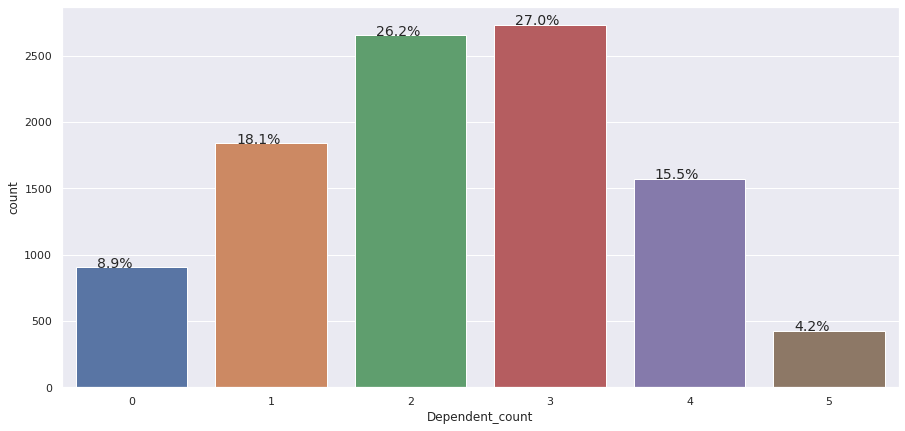

In [42]:
perc_on_bar(df['Dependent_count'])

- most customers have dependents; 2-3 is most common

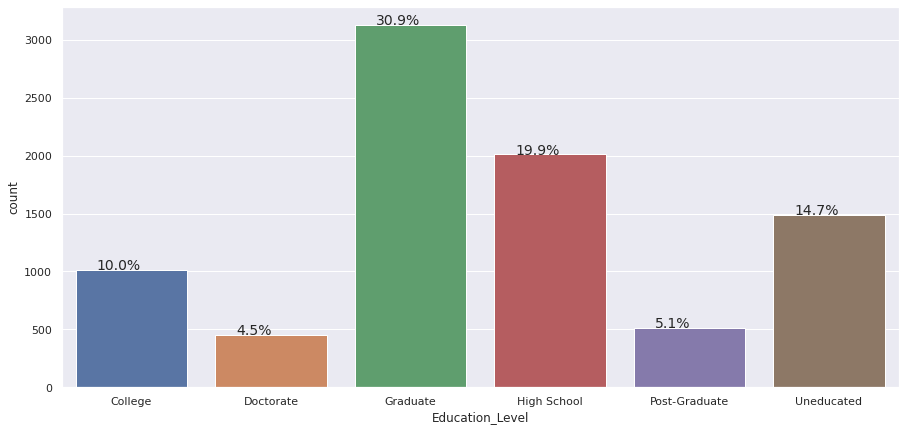

In [43]:
perc_on_bar(df['Education_Level'])

- The majority of customers have at least a high school education and may have received college degrees

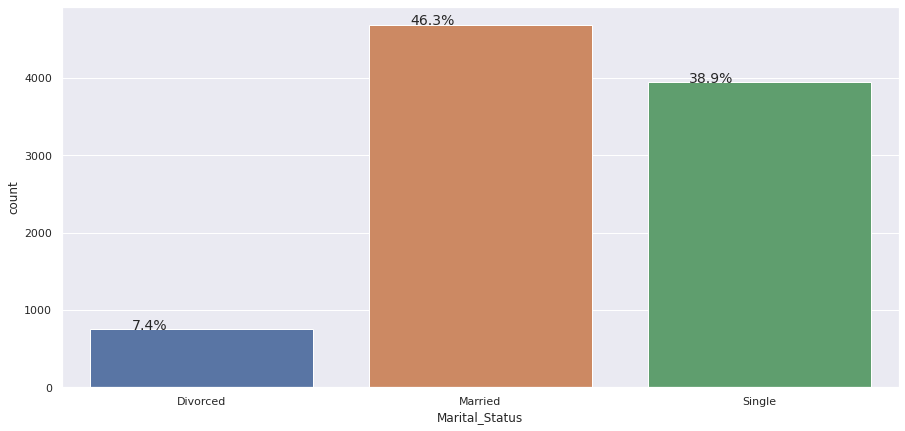

In [44]:
perc_on_bar(df['Marital_Status'])

- Customer are mostly married

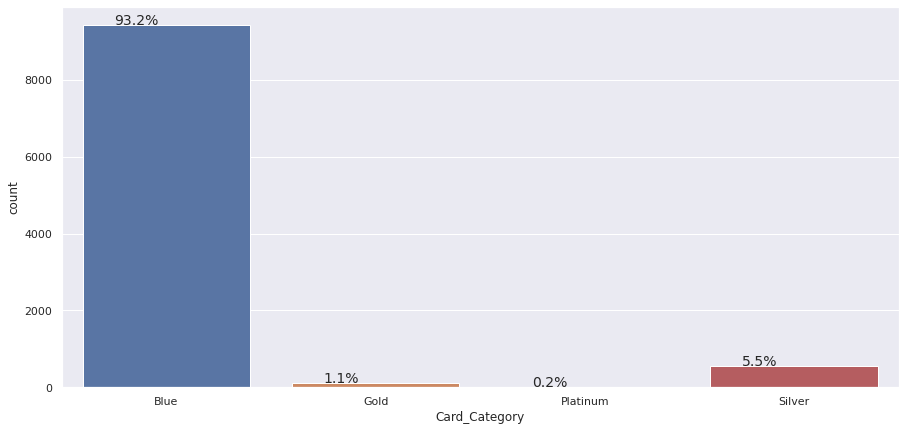

In [45]:
perc_on_bar(df['Card_Category'])

- Blue is by far the most common card

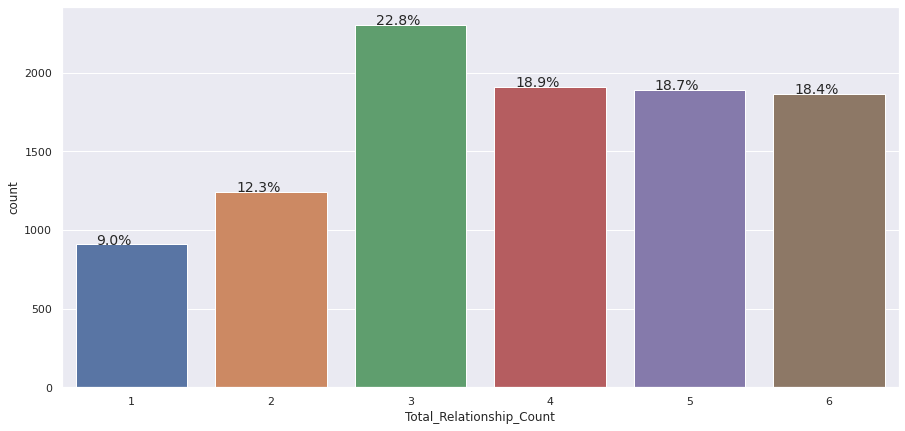

In [46]:
perc_on_bar(df['Total_Relationship_Count'])

- most customers have more than one product with the bank

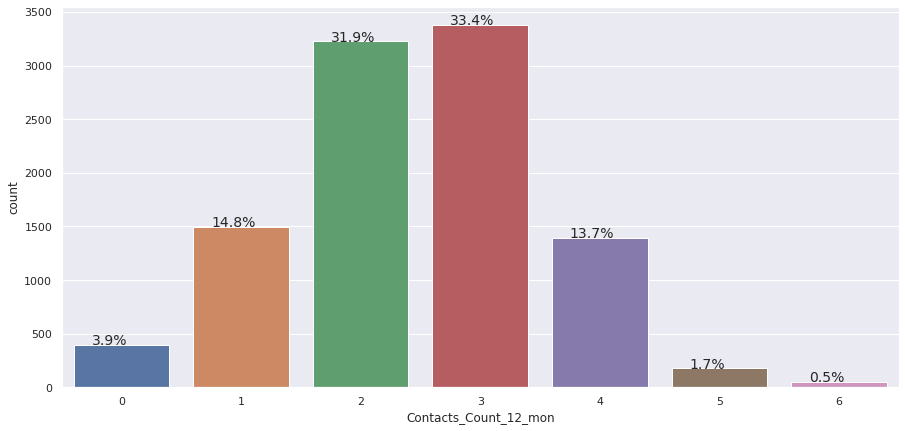

In [47]:
perc_on_bar(df['Contacts_Count_12_mon'])

- on average customers tend to contact the bank 2-3 times per year

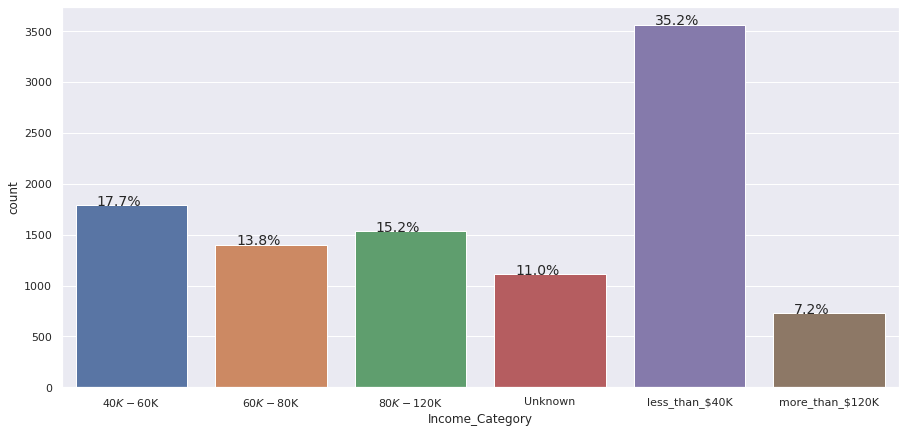

In [48]:
perc_on_bar(df['Income_Category'])

- on average customers make less than 60K per year with many making less than 40K

## Bivariate Analysis

### Pairplot

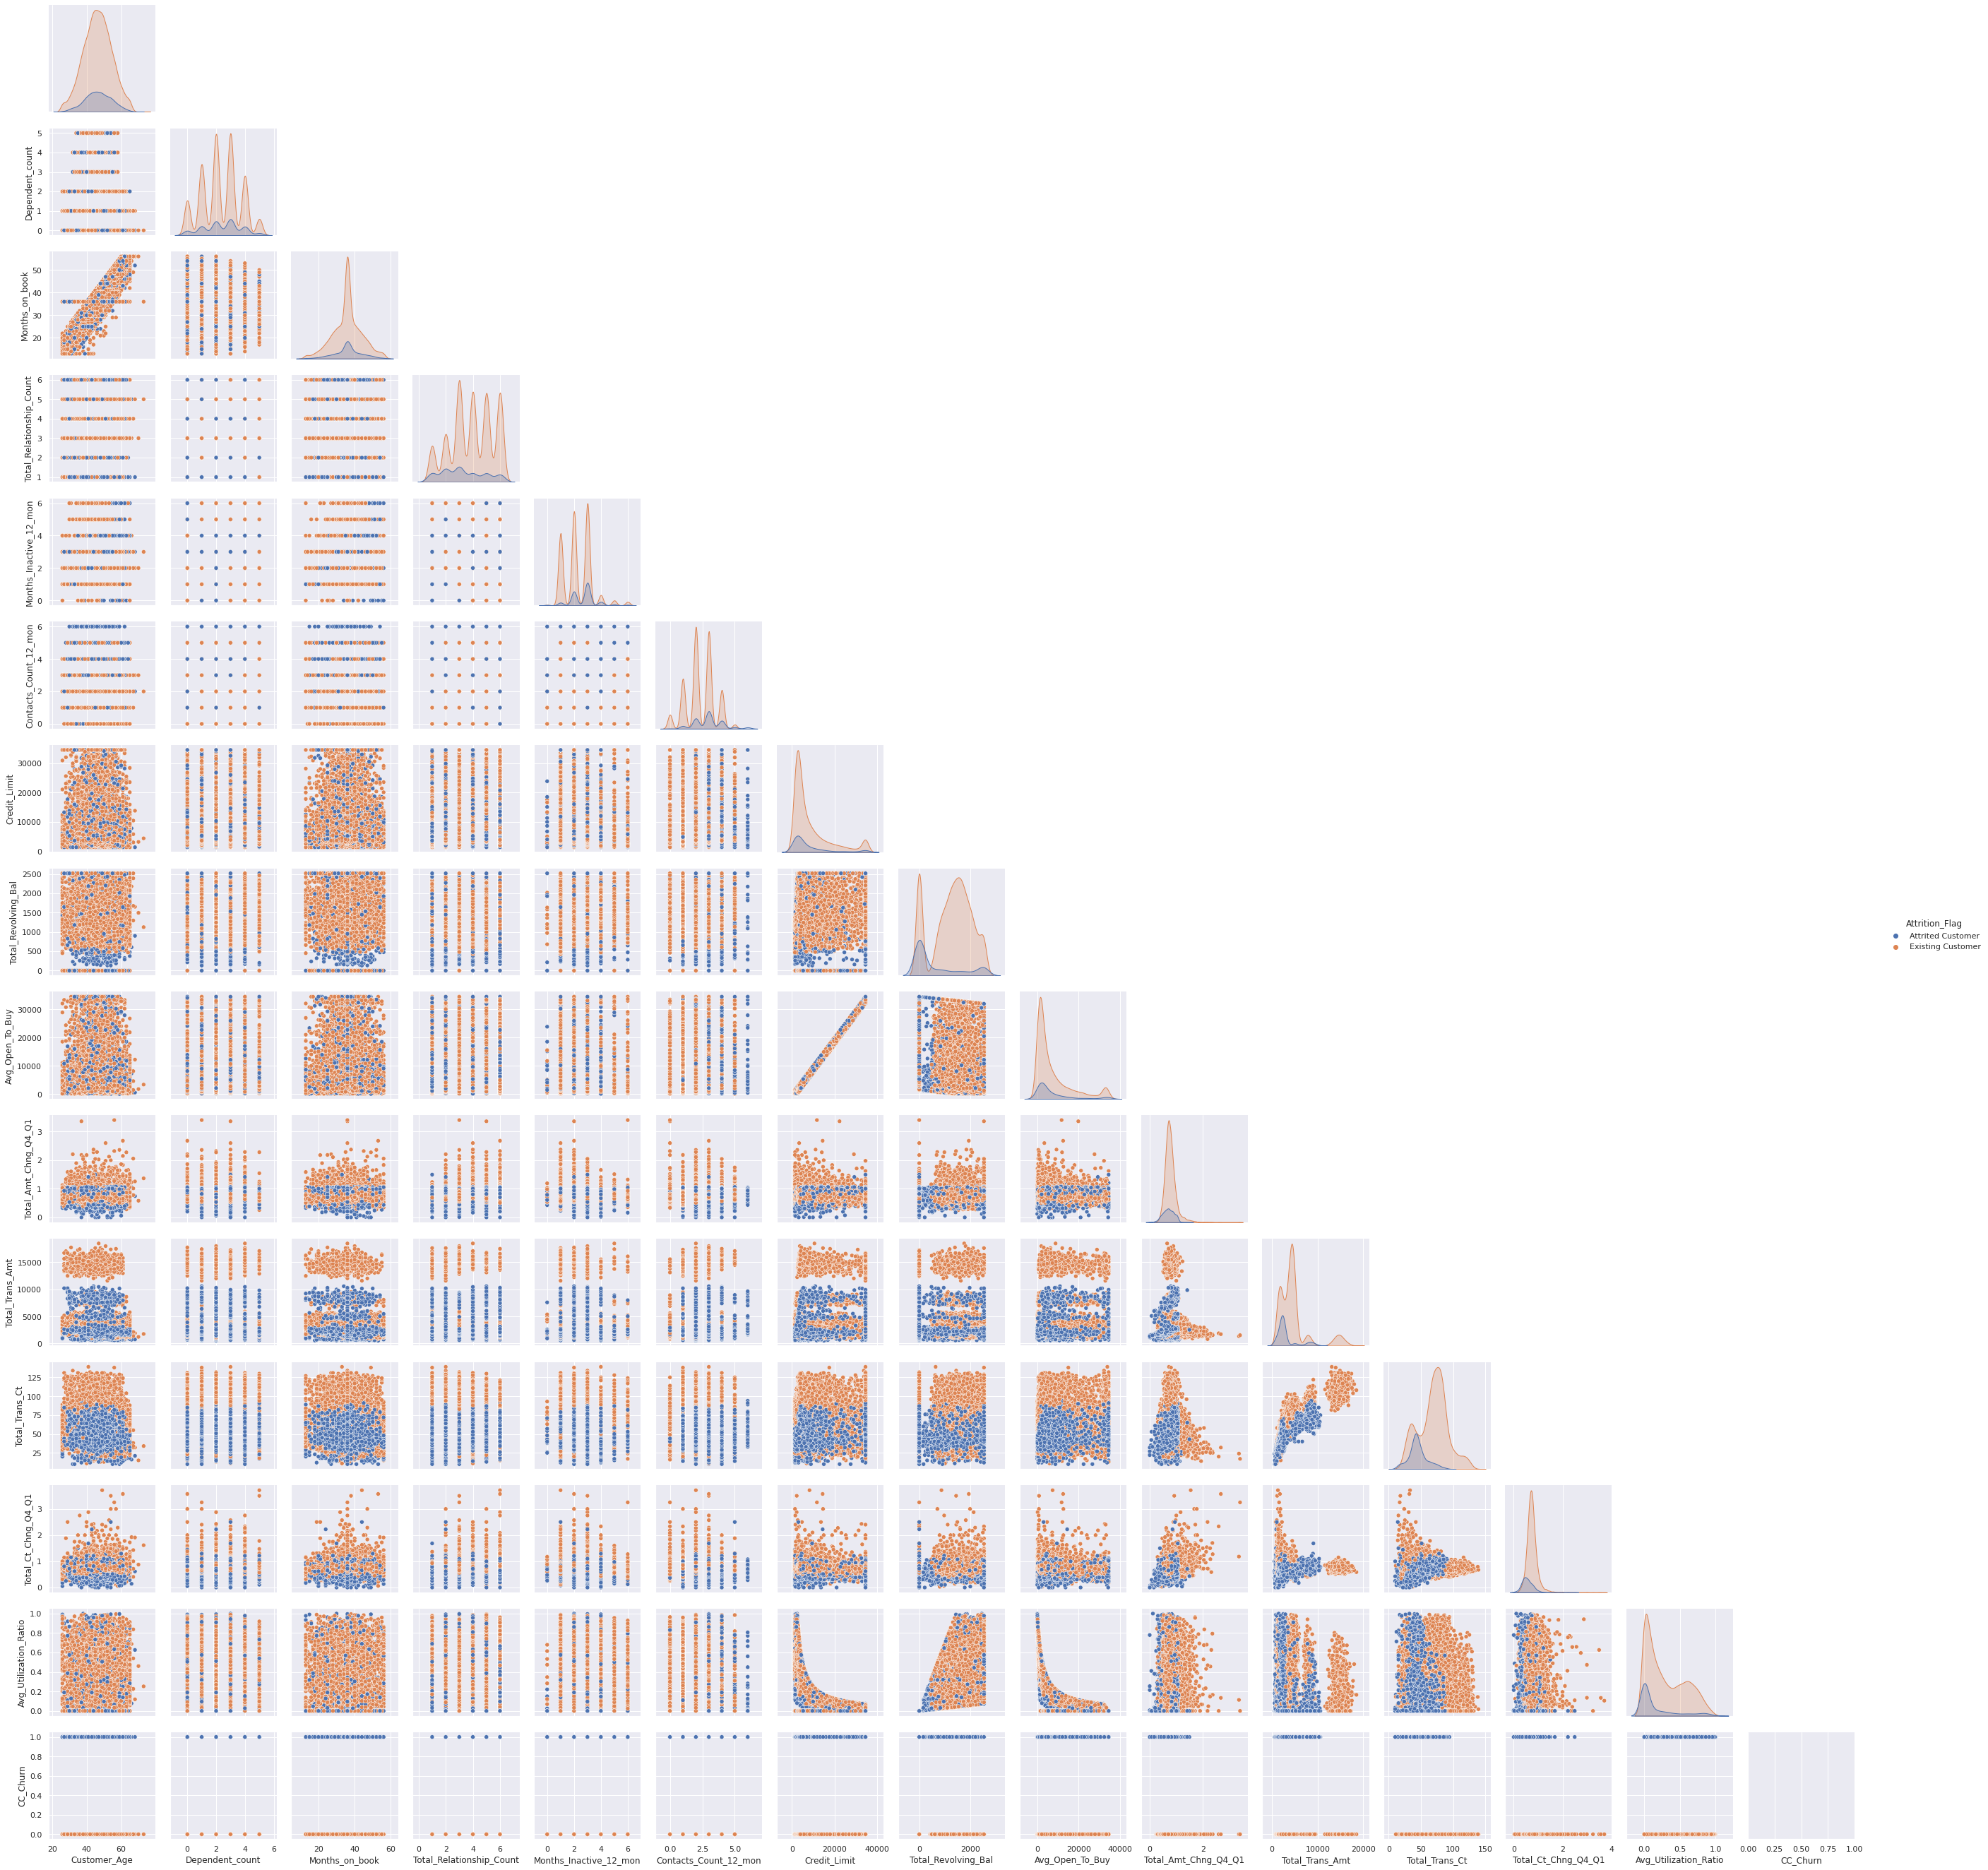

In [49]:
sns.pairplot(df, hue="Attrition_Flag", corner=True)

In [50]:
#sns.pairplot(df['Customer_Age', 'Months_on_Book', 'Credit_Limit', 'Total_Revolving_Balance', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1'], hue="Attrition_Flag", corner=True)

### Correlation Heatmap

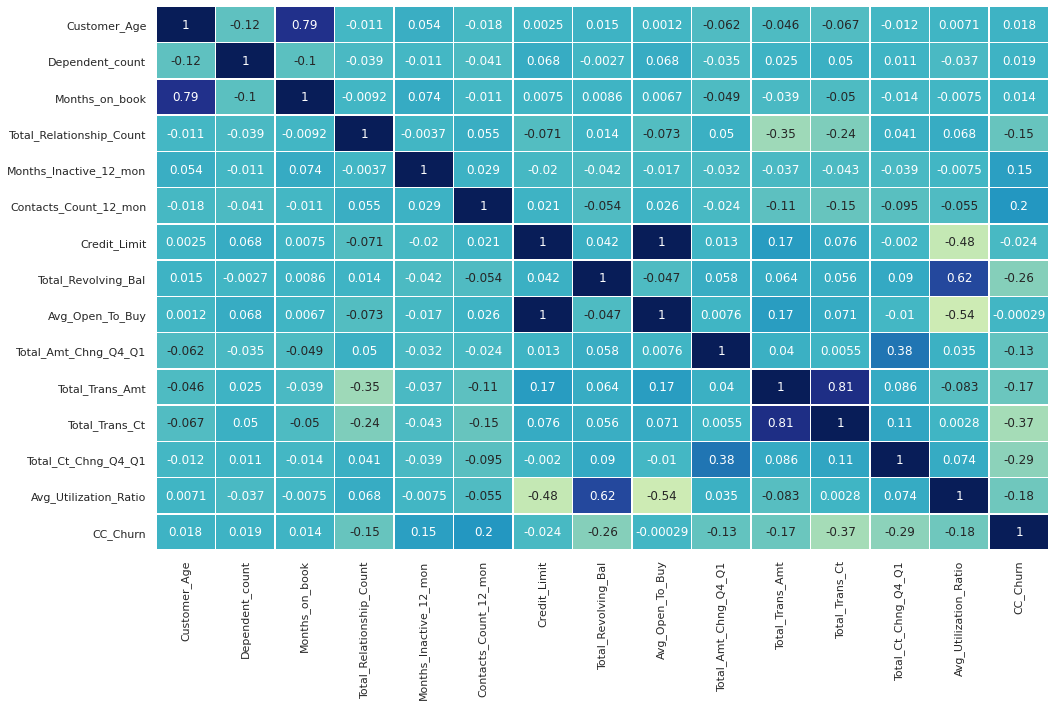

In [51]:
sns.set(rc={'figure.figsize':(16,10)})
sns.heatmap(df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

- Customer_Age and Months_on_book have a 0.79 correlation
- Avg_Utilization_Ratio and Total_Revolving_Bal have a 0.62 correlation which makes sense
- Total_Trans_Amt and Total_Trans_Ct have a strong 0.81 correlation
- Credit_Limit and Avg_Open_To_Buy have a perfect correlation of 1.0
- Avg_Open_To_Buy and Avg_Utilization_Ratio have a slight negative correlation of -0.54

In [52]:
# drop columns with strong correlation Total_Trans_Amt and Avg_Open_To_Buy

df.drop(['Total_Trans_Ct'], axis=1, inplace=True) # correlated with Total_Trans_Amt
df.drop(['Avg_Open_To_Buy'], axis=1, inplace=True) # correlated with Credit_Limit
df.drop(['Months_on_book'], axis=1, inplace=True) # correlated with Age

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  object  
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           8608 non-null   category
 5   Marital_Status            9378 non-null   category
 6   Income_Category           10127 non-null  category
 7   Card_Category             10127 non-null  category
 8   Total_Relationship_Count  10127 non-null  int64   
 9   Months_Inactive_12_mon    10127 non-null  int64   
 10  Contacts_Count_12_mon     10127 non-null  int64   
 11  Credit_Limit              10127 non-null  float64 
 12  Total_Revolving_Bal       10127 non-null  int64   
 13  Total_Amt_Chng_Q4_Q1      10127 non-null  floa

### Stacked Bars with dependent variable

In [54]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,df['Attrition_Flag'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,df['Attrition_Flag'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(20,10))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

Attrition_Flag  Attrited Customer  Existing Customer    All
Gender                                                     
F                             930               4428   5358
M                             697               4072   4769
All                          1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


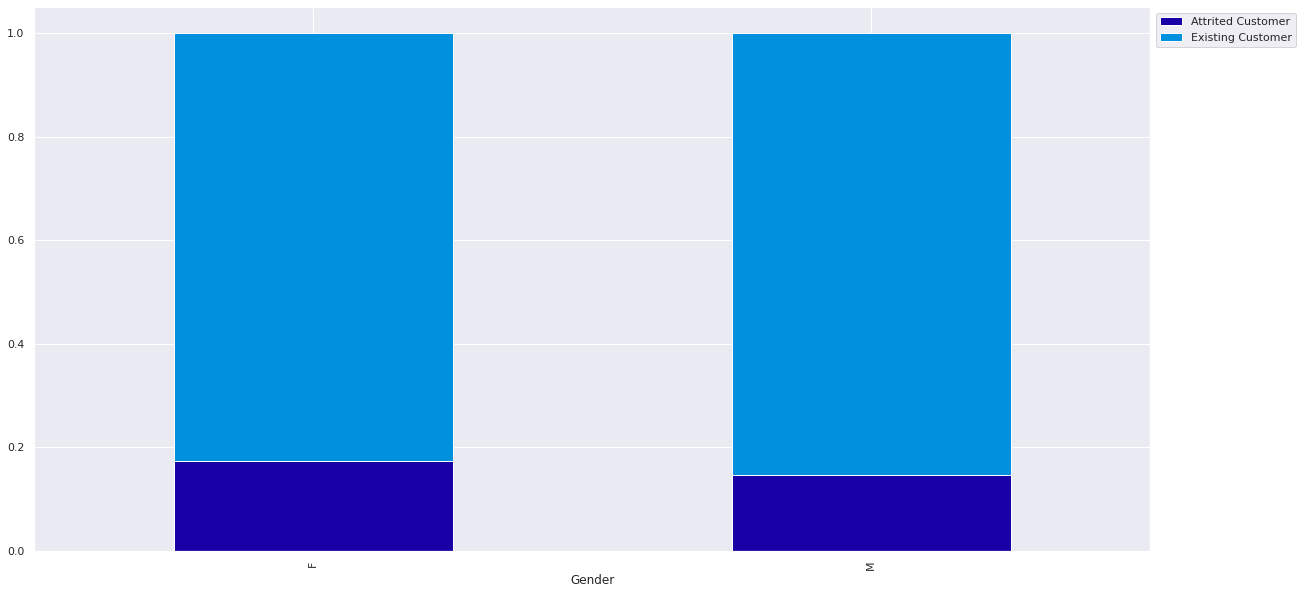

In [55]:
stacked_plot(df['Gender'])

- Gender does not seem to affect attrition

Attrition_Flag   Attrited Customer  Existing Customer    All
Dependent_count                                             
0                              135                769    904
1                              269               1569   1838
2                              417               2238   2655
3                              482               2250   2732
4                              260               1314   1574
5                               64                360    424
All                           1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


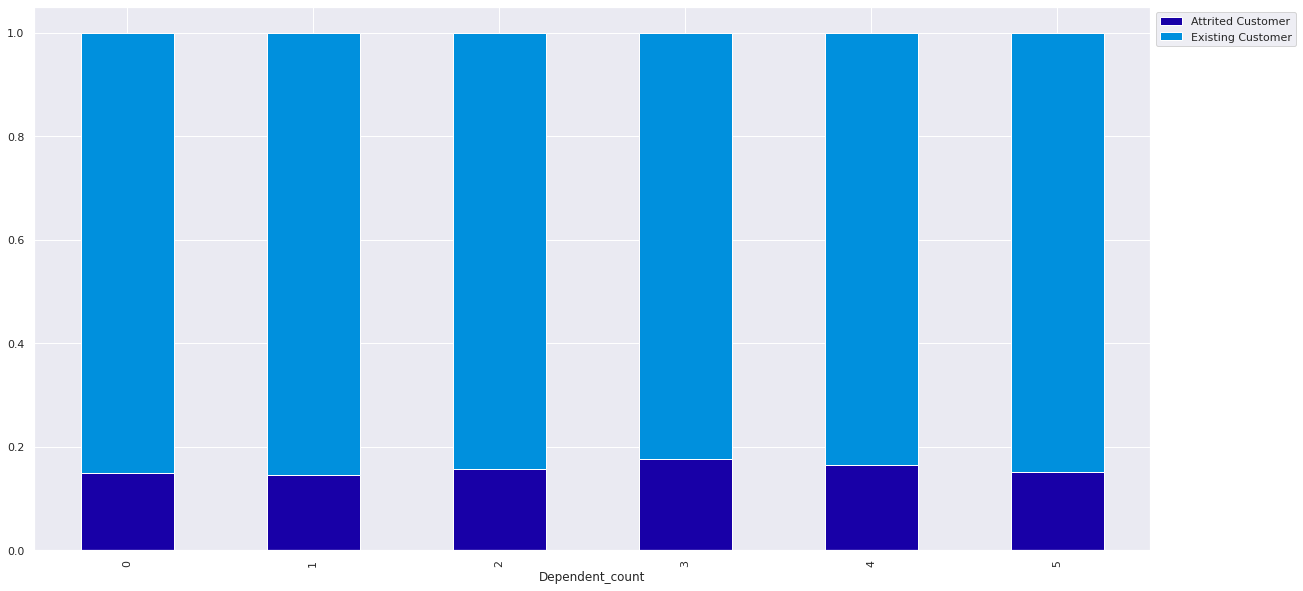

In [56]:
stacked_plot(df['Dependent_count'])

- No. of Dependents does not seem to impact attrition meaningfully

Attrition_Flag   Attrited Customer  Existing Customer   All
Education_Level                                            
College                        154                859  1013
Doctorate                       95                356   451
Graduate                       487               2641  3128
High School                    306               1707  2013
Post-Graduate                   92                424   516
Uneducated                     237               1250  1487
All                           1371               7237  8608
------------------------------------------------------------------------------------------------------------------------


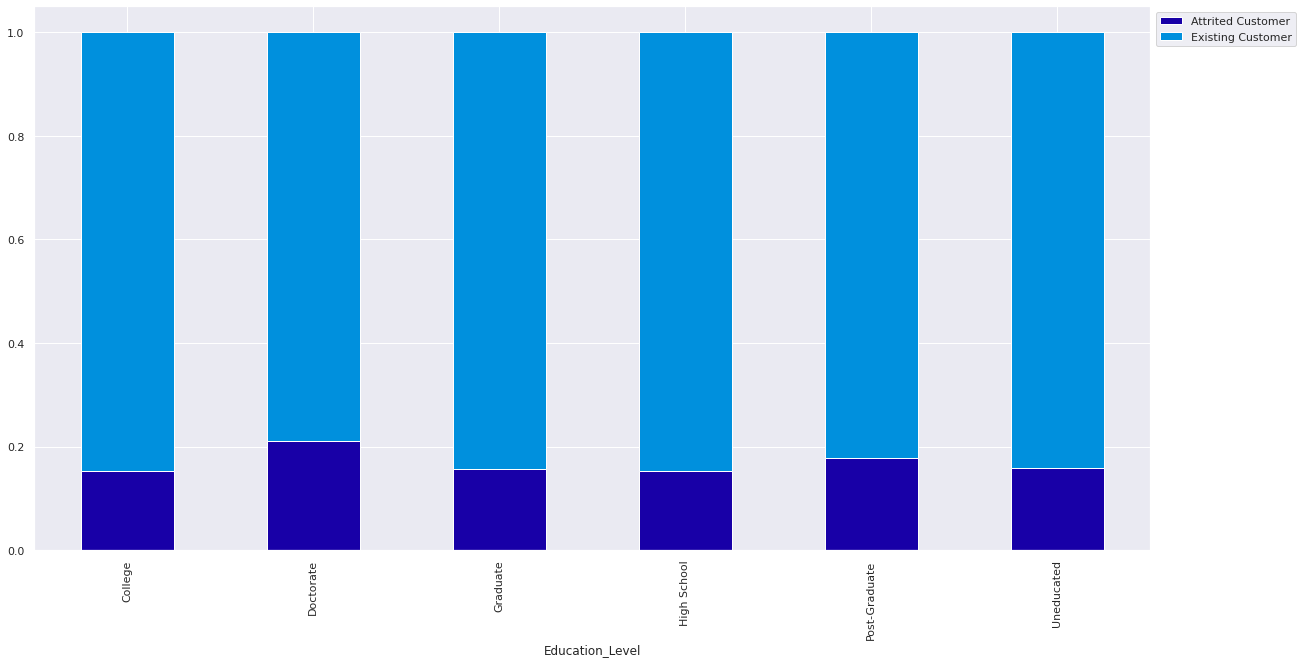

In [57]:
stacked_plot(df['Education_Level'])

- Doctorate seem to have higher attrition rate on a relative basis

Attrition_Flag  Attrited Customer  Existing Customer   All
Marital_Status                                            
Divorced                      121                627   748
Married                       709               3978  4687
Single                        668               3275  3943
All                          1498               7880  9378
------------------------------------------------------------------------------------------------------------------------


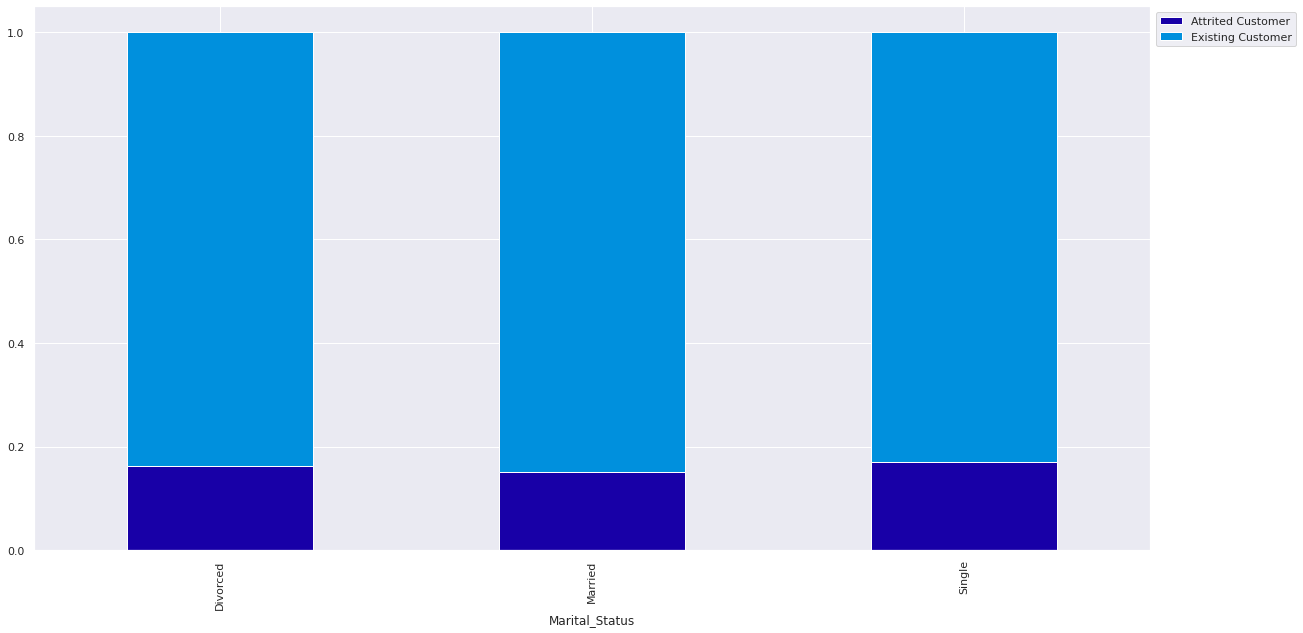

In [58]:
stacked_plot(df['Marital_Status'])

- Married customers have slightly lower attrition rates on a relative basis

Attrition_Flag   Attrited Customer  Existing Customer    All
Income_Category                                             
$40K-$60K                      271               1519   1790
$60K-$80K                      189               1213   1402
$80K-$120K                     242               1293   1535
Unknown                        187                925   1112
less_than_$40K                 612               2949   3561
more_than_$120K                126                601    727
All                           1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


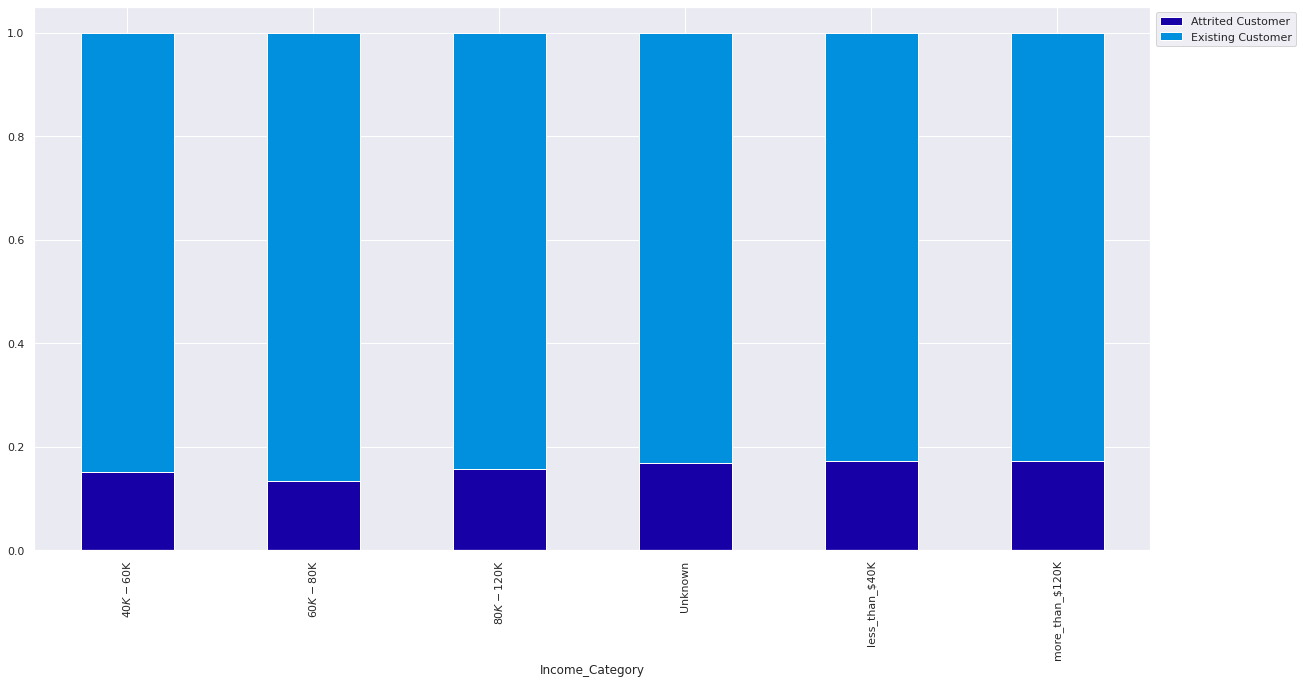

In [59]:
stacked_plot(df['Income_Category'])

- Customers with <40K income and 120K+ seem to have the highest churn on a relative basis

Attrition_Flag  Attrited Customer  Existing Customer    All
Card_Category                                              
Blue                         1519               7917   9436
Gold                           21                 95    116
Platinum                        5                 15     20
Silver                         82                473    555
All                          1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


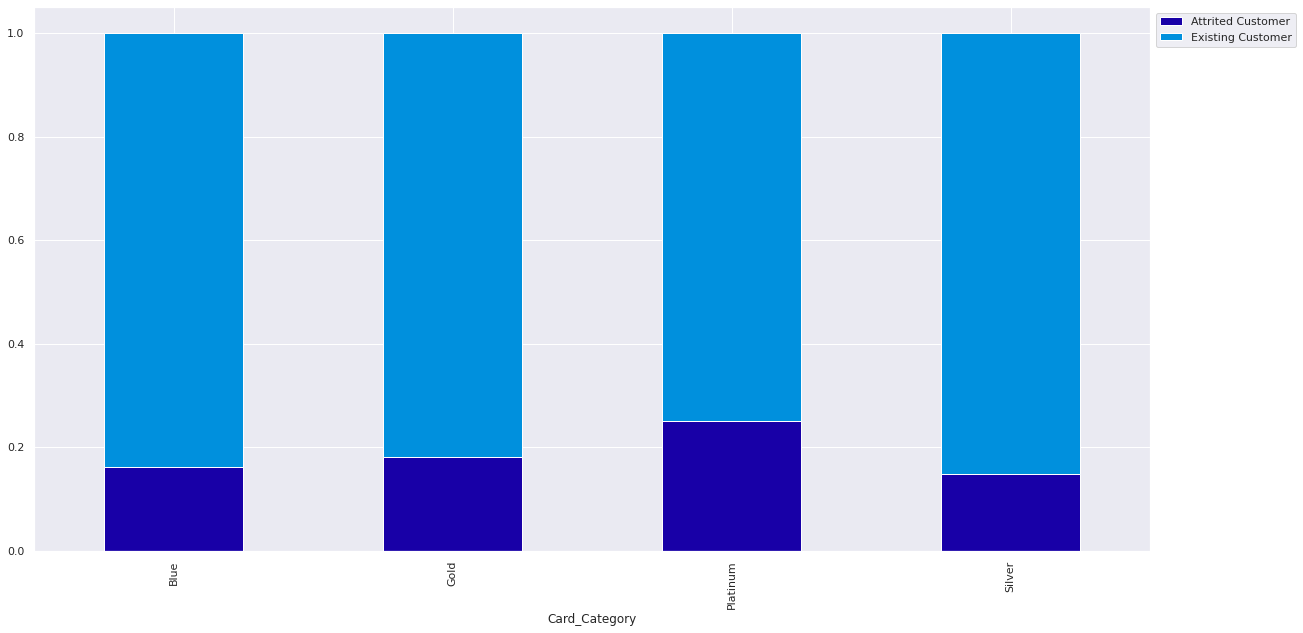

In [60]:
stacked_plot(df['Card_Category'])

- Blue is the highest number of customers but Platinum customers appear to have higher attrtion on a a relative basis

Attrition_Flag            Attrited Customer  Existing Customer    All
Total_Relationship_Count                                             
1                                       233                677    910
2                                       346                897   1243
3                                       400               1905   2305
4                                       225               1687   1912
5                                       227               1664   1891
6                                       196               1670   1866
All                                    1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


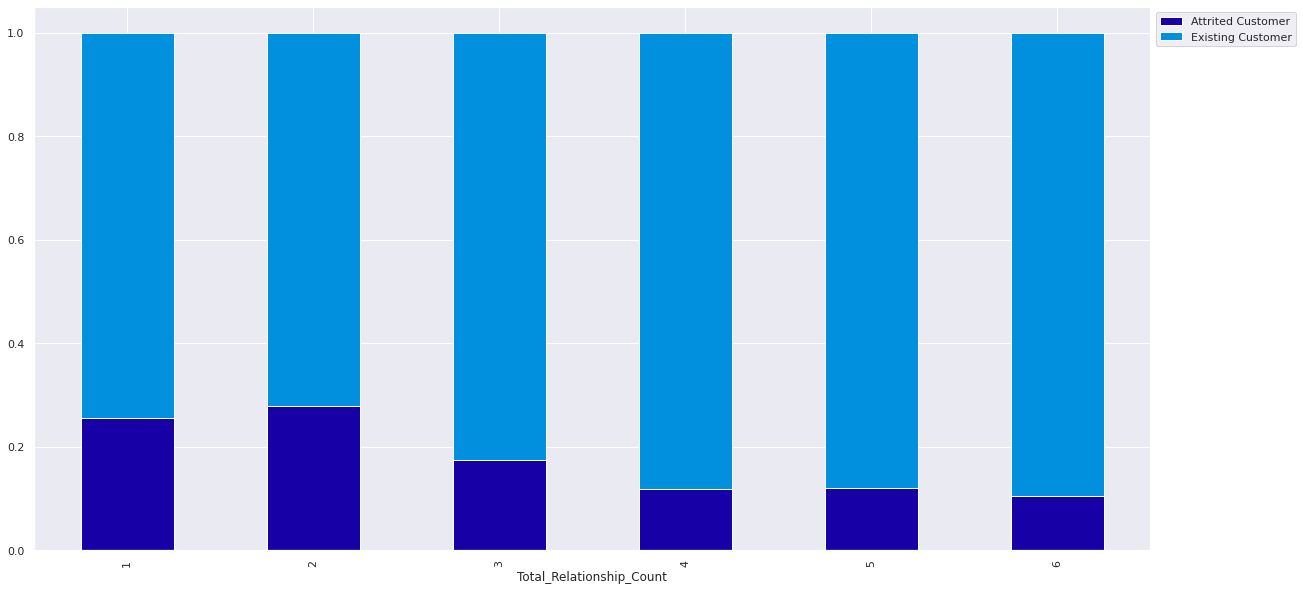

In [61]:
stacked_plot(df['Total_Relationship_Count'])

- Customers with more bank products are less likely to attrite as expected

Attrition_Flag          Attrited Customer  Existing Customer    All
Months_Inactive_12_mon                                             
0                                      15                 14     29
1                                     100               2133   2233
2                                     505               2777   3282
3                                     826               3020   3846
4                                     130                305    435
5                                      32                146    178
6                                      19                105    124
All                                  1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


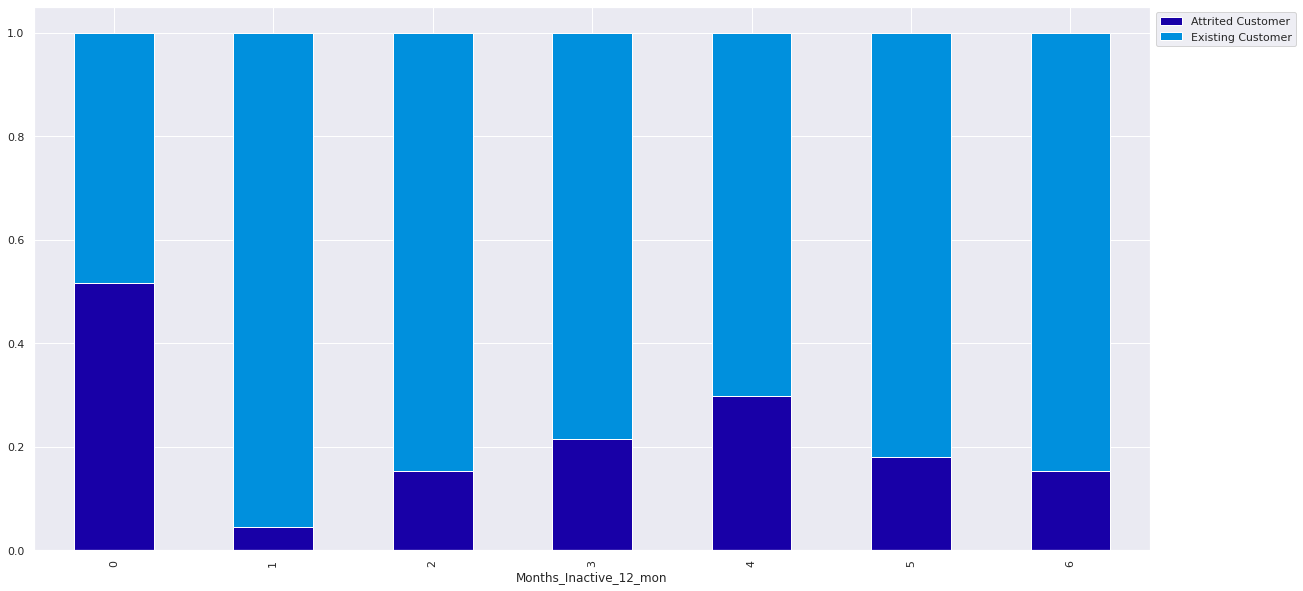

In [62]:
stacked_plot(df['Months_Inactive_12_mon'])

- Interestingly, customers that have not been inactive (i.e. more active) are more likely to attrite
- This would need to be looked at more closely to understand the context of these interactions and timing. Maybe they are active because they are filing complains, for example.

Attrition_Flag         Attrited Customer  Existing Customer    All
Contacts_Count_12_mon                                             
0                                      7                392    399
1                                    108               1391   1499
2                                    403               2824   3227
3                                    681               2699   3380
4                                    315               1077   1392
5                                     59                117    176
6                                     54                  0     54
All                                 1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


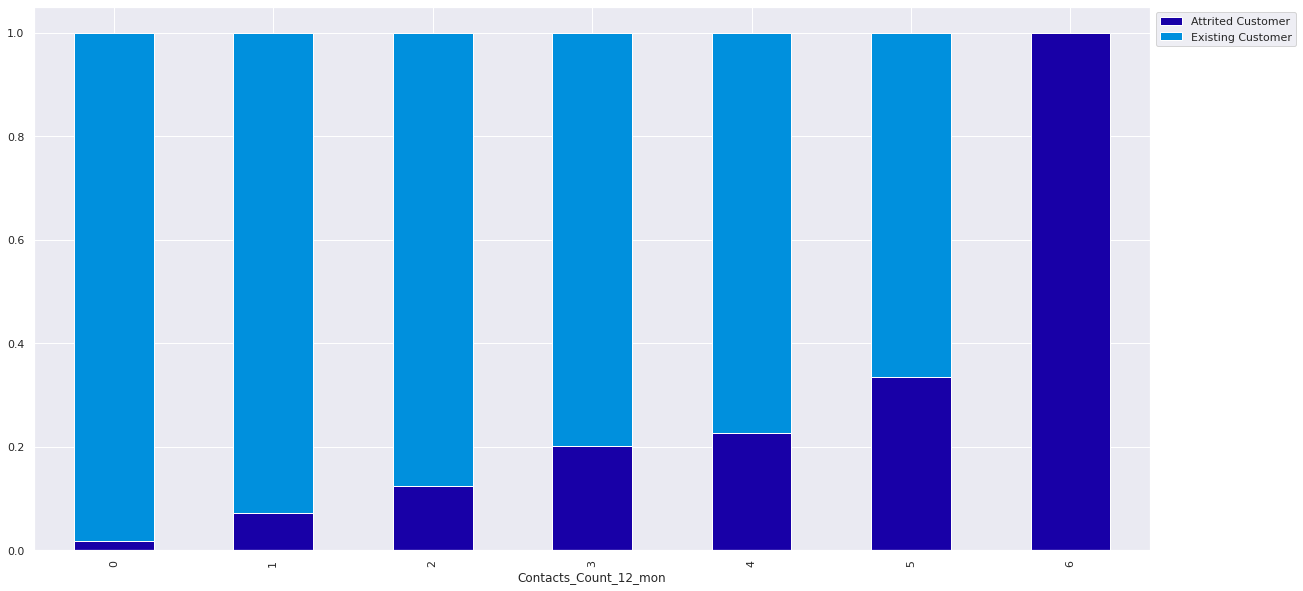

In [63]:
stacked_plot(df['Contacts_Count_12_mon'])

- Again, we see more active customers are more likely to leave but we need to see more business context
- Are they unhappy, is this why the are contacting the bank?

Attrition_Flag  Attrited Customer  Existing Customer    All
Customer_Age                                               
26                              6                 72     78
27                              3                 29     32
28                              1                 28     29
29                              7                 49     56
30                             15                 55     70
31                             13                 78     91
32                             17                 89    106
33                             20                107    127
34                             19                127    146
35                             21                163    184
36                             24                197    221
37                             37                223    260
38                             47                256    303
39                             48                285    333
40                             64       

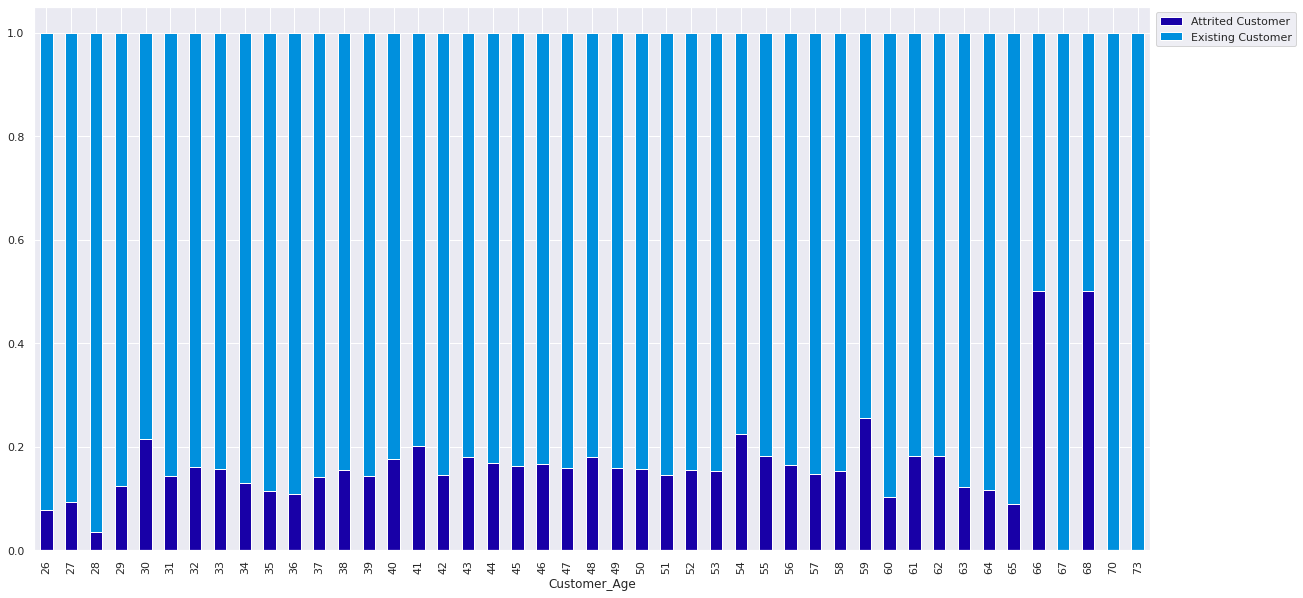

In [64]:
stacked_plot(df['Customer_Age'])

- No discernable pattern here
- Age 66 abd 68 have higher churn but there are limited observations

### Boxplot Analysis

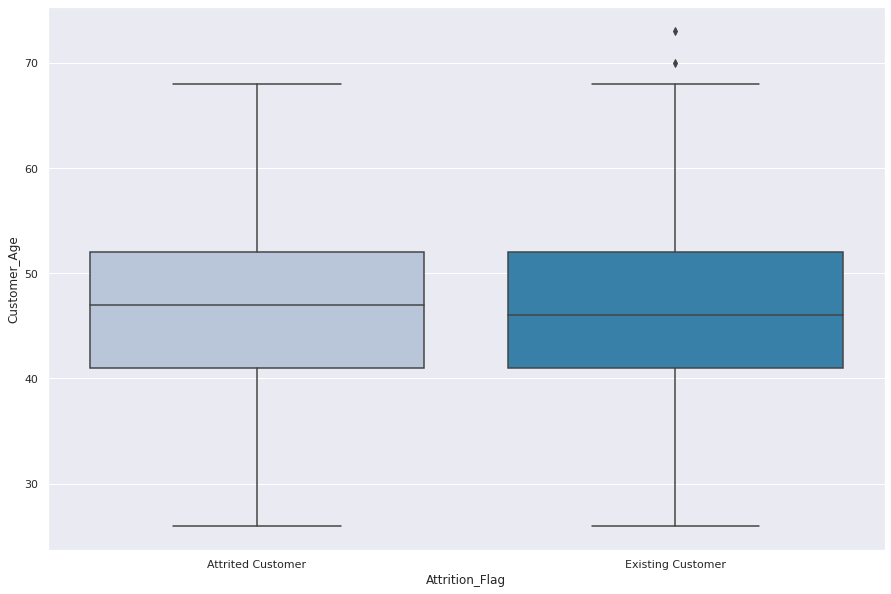

In [65]:
plt.figure(figsize=(15,10))
sns.boxplot(df["Attrition_Flag"],df["Customer_Age"],palette="PuBu")
plt.show()

- Age does not seem to be a major factor in churn

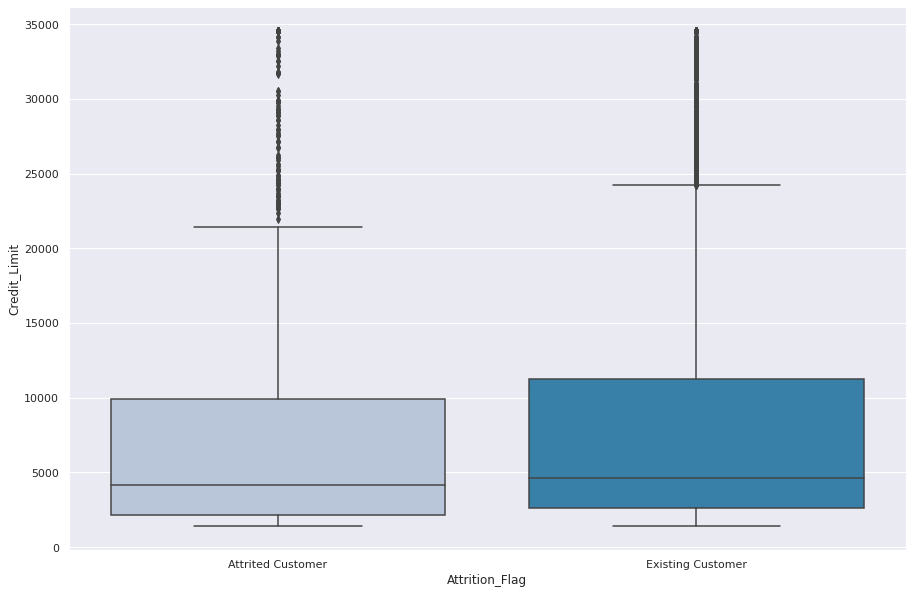

In [66]:
plt.figure(figsize=(15,10))
sns.boxplot(df["Attrition_Flag"],df["Credit_Limit"],palette="PuBu")
plt.show()

- Customers with lower credit limits are slightly more likely to churn

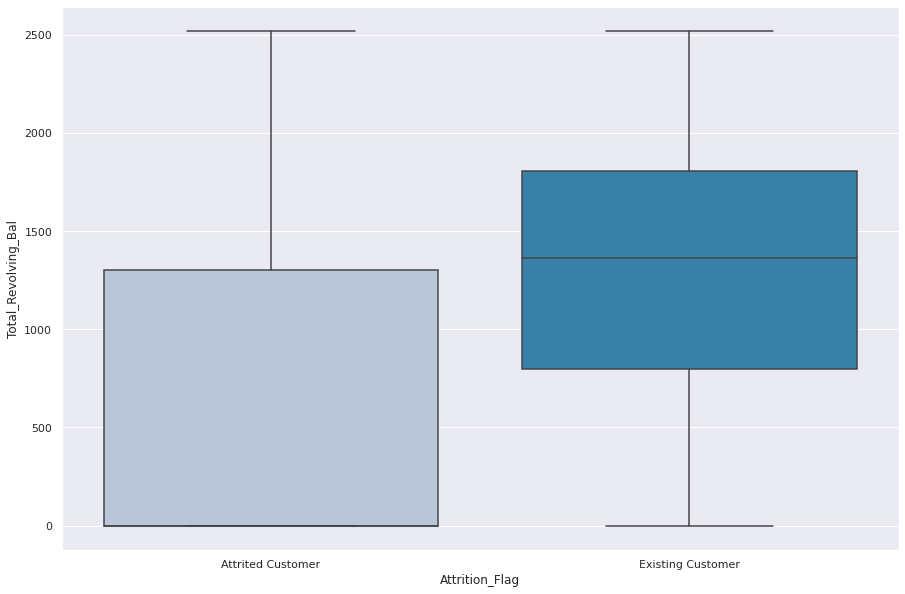

In [67]:
plt.figure(figsize=(15,10))
sns.boxplot(df["Attrition_Flag"],df["Total_Revolving_Bal"],palette="PuBu")
plt.show()

- Customers with lower revolving balance are more likely to churn

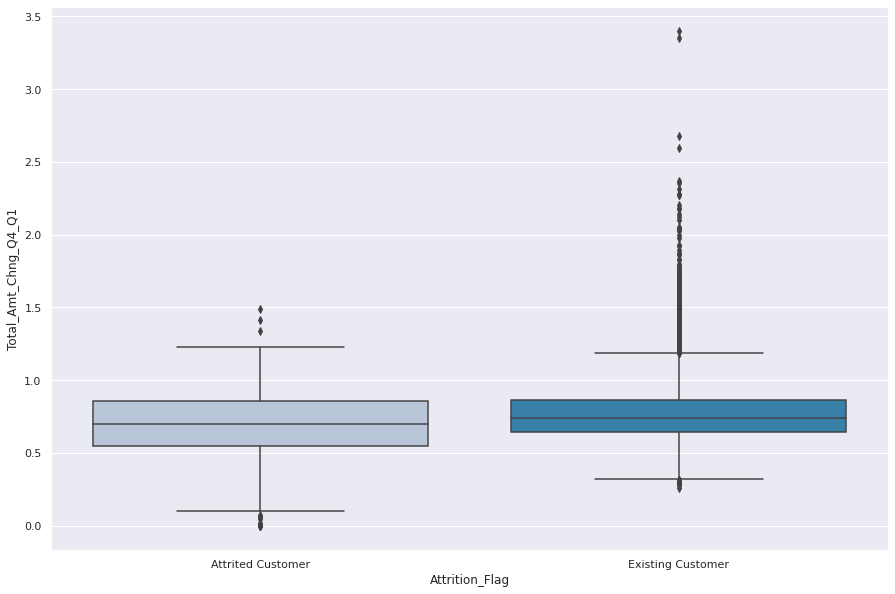

In [68]:
plt.figure(figsize=(15,10))
sns.boxplot(df["Attrition_Flag"],df["Total_Amt_Chng_Q4_Q1"],palette="PuBu")
plt.show()

- Churners tend to have lower Q4/Q1 spending amount ratios

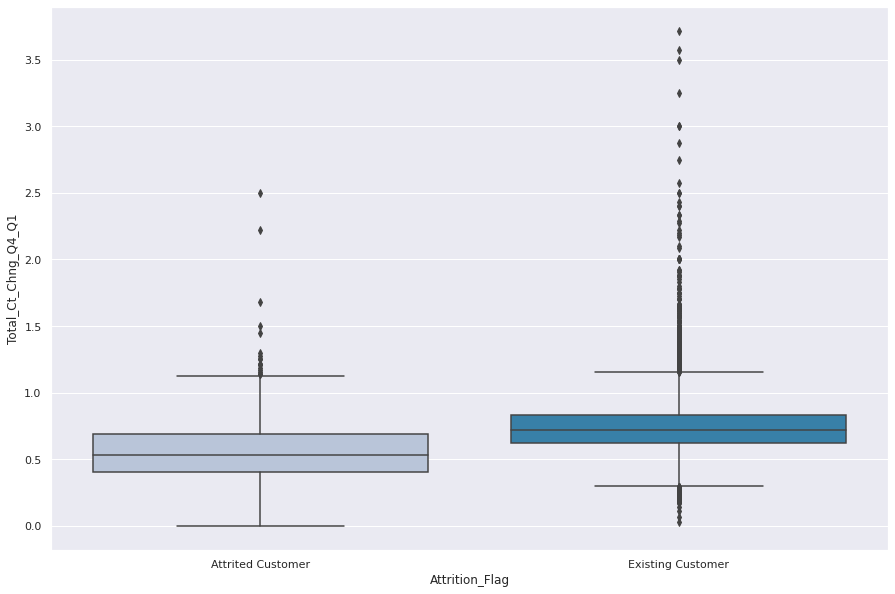

In [69]:
plt.figure(figsize=(15,10))
sns.boxplot(df["Attrition_Flag"],df["Total_Ct_Chng_Q4_Q1"],palette="PuBu")
plt.show()

- Customers with higher number of transactions in Q1 vs Q4 are less likely to churn

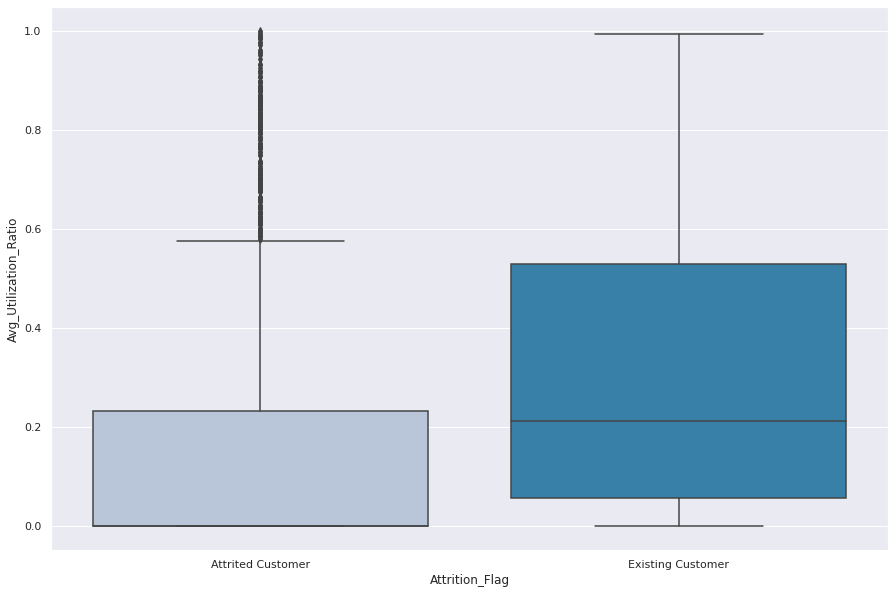

In [70]:
plt.figure(figsize=(15,10))
sns.boxplot(df["Attrition_Flag"],df["Avg_Utilization_Ratio"],palette="PuBu")
plt.show()

- Customers with higher average utilization are less likely to churn

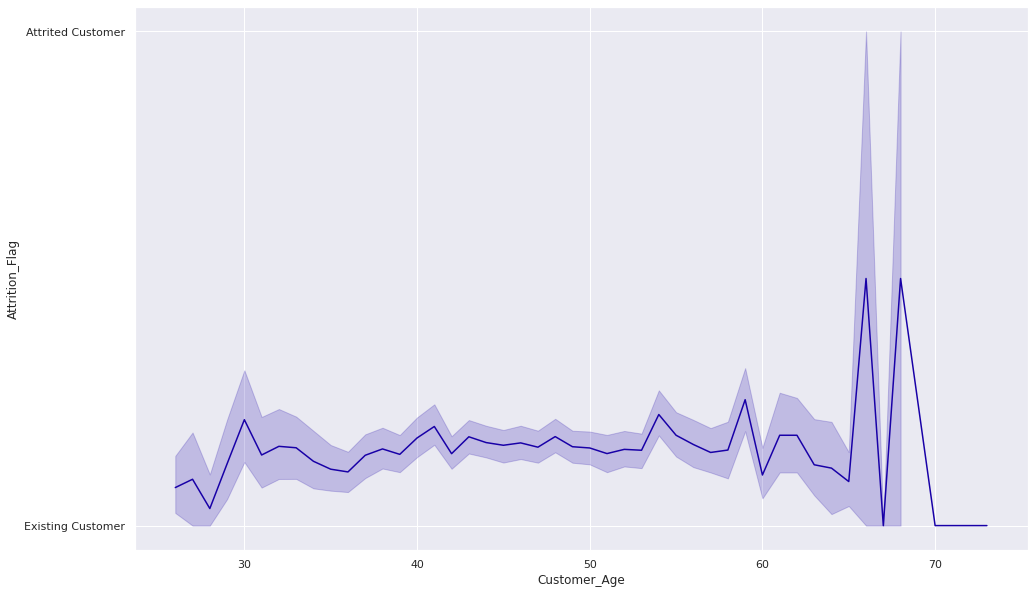

In [71]:
sns.lineplot(x='Customer_Age',y='Attrition_Flag',data=df)

### Grouping by Credit Card Category customer profiles

In [72]:
data[(data['Card_Category']=='Blue')].describe(include='all').T

count unique                top  freq  \
CLIENTNUM                9436.000    NaN                NaN   NaN   
Attrition_Flag               9436      2  Existing Customer  7917   
Customer_Age             9436.000    NaN                NaN   NaN   
Gender                       9436      2                  F  5101   
Dependent_count          9436.000    NaN                NaN   NaN   
Education_Level              8016      6           Graduate  2899   
Marital_Status               8753      3            Married  4433   
Income_Category              9436      6     Less than $40K  3403   
Card_Category                9436      1               Blue  9436   
Months_on_book           9436.000    NaN                NaN   NaN   
Total_Relationship_Count 9436.000    NaN                NaN   NaN   
Months_Inactive_12_mon   9436.000    NaN                NaN   NaN   
Contacts_Count_12_mon    9436.000    NaN                NaN   NaN   
Credit_Limit             9436.000    NaN                NaN   NaN   
Total_Revolving_Bal      9436.000    NaN                NaN   NaN   
Avg_Open_To_Buy          9436.000    NaN                NaN   NaN   
Total_Amt_Chng_Q4_Q1     9436.000    NaN                NaN   NaN   
Total_Trans_Amt          9436.000    NaN                NaN   NaN   
Total_Trans_Ct           9436.000    NaN                NaN   NaN   
Total_Ct_Chng_Q4_Q1      9436.000    NaN                NaN   NaN   
Avg_Utilization_Ratio    9436.000    NaN                NaN   NaN   

                                  mean          std           min  \
CLIENTNUM                739120250.518 36860298.173 708082083.000   
Attrition_Flag                     NaN          NaN           NaN   
Customer_Age                    46.372        8.070        26.000   
Gender                             NaN          NaN           NaN   
Dependent_count                  2.336        1.295         0.000   
Education_Level                    NaN          NaN           NaN   
Marital_Status                     NaN          NaN           NaN   
Income_Category                    NaN          NaN           NaN   
Card_Category                      NaN          NaN           NaN   
Months_on_book                  35.961        8.032        13.000   
Total_Relationship_Count         3.849        1.541         1.000   
Months_Inactive_12_mon           2.346        1.015         0.000   
Contacts_Count_12_mon            2.456        1.110         0.000   
Credit_Limit                  7363.780     7644.249      1438.300   
Total_Revolving_Bal           1157.812      816.119         0.000   
Avg_Open_To_Buy               6205.968     7660.700         3.000   
Total_Amt_Chng_Q4_Q1             0.760        0.220         0.000   
Total_Trans_Amt               4225.407     3196.100       510.000   
Total_Trans_Ct                  64.028       22.958        10.000   
Total_Ct_Chng_Q4_Q1              0.713        0.240         0.000   
Avg_Utilization_Ratio            0.291        0.279         0.000   

                                   25%           50%           75%  \
CLIENTNUM                713049633.000 717913645.500 772785558.000   
Attrition_Flag                     NaN           NaN           NaN   
Customer_Age                    41.000        46.000        52.000   
Gender                             NaN           NaN           NaN   
Dependent_count                  1.000         2.000         3.000   
Education_Level                    NaN           NaN           NaN   
Marital_Status                     NaN           NaN           NaN   
Income_Category                    NaN           NaN           NaN   
Card_Category                      NaN           NaN           NaN   
Months_on_book                  31.000        36.000        40.000   
Total_Relationship_Count         3.000         4.000         5.000   
Months_Inactive_12_mon           2.000         2.000         3.000   
Contacts_Count_12_mon            2.000         2.000         3.000   
Credit_Lim

In [73]:
data[(data['Card_Category']=='Silver')].describe(include='all').T

count unique                top freq          mean  \
CLIENTNUM                555.000    NaN                NaN  NaN 740514687.054   
Attrition_Flag               555      2  Existing Customer  473           NaN   
Customer_Age             555.000    NaN                NaN  NaN        45.679   
Gender                       555      2                  M  345           NaN   
Dependent_count          555.000    NaN                NaN  NaN         2.440   
Education_Level              477      6           Graduate  185           NaN   
Marital_Status               503      3             Single  251           NaN   
Income_Category              555      6     Less than $40K  130           NaN   
Card_Category                555      1             Silver  555           NaN   
Months_on_book           555.000    NaN                NaN  NaN        35.452   
Total_Relationship_Count 555.000    NaN                NaN  NaN         3.422   
Months_Inactive_12_mon   555.000    NaN                NaN  NaN         2.274   
Contacts_Count_12_mon    555.000    NaN                NaN  NaN         2.450   
Credit_Limit             555.000    NaN                NaN  NaN     25277.836   
Total_Revolving_Bal      555.000    NaN                NaN  NaN      1206.130   
Avg_Open_To_Buy          555.000    NaN                NaN  NaN     24071.706   
Total_Amt_Chng_Q4_Q1     555.000    NaN                NaN  NaN         0.762   
Total_Trans_Amt          555.000    NaN                NaN  NaN      6590.483   
Total_Trans_Ct           555.000    NaN                NaN  NaN        74.701   
Total_Ct_Chng_Q4_Q1      555.000    NaN                NaN  NaN         0.709   
Avg_Utilization_Ratio    555.000    NaN                NaN  NaN         0.057   

                                  std           min           25%  \
CLIENTNUM                37558565.572 708123033.000 712979283.000   
Attrition_Flag                    NaN           NaN           NaN   
Customer_Age                    7.422        26.000        41.000   
Gender                            NaN           NaN           NaN   
Dependent_count                 1.353         0.000         1.500   
Education_Level                   NaN           NaN           NaN   
Marital_Status                    NaN           NaN           NaN   
Income_Category                   NaN           NaN           NaN   
Card_Category                     NaN           NaN           NaN   
Months_on_book                  7.512        13.000        32.000   
Total_Relationship_Count        1.656         1.000         2.000   
Months_Inactive_12_mon          0.923         0.000         2.000   
Contacts_Count_12_mon           1.052         0.000         2.000   
Credit_Limit                 9652.816      3735.000     15153.000   
Total_Revolving_Bal           802.013         0.000       607.500   
Avg_Open_To_Buy              9644.338      3735.000     13960.000   
Total_Amt_Chng_Q4_Q1            0.205         0.000         0.647   
Total_Trans_Amt              4841.861       691.000      2918.000   
Total_Trans_Ct                 27.067        13.000        56.500   
Total_Ct_Chng_Q4_Q1             0.221         0.000         0.600   
Avg_Utilization_Ratio           0.051         0.000         0.022   

                                   50%           75%           max  
CLIENTNUM                718505958.000 779296270.500 826451433.000  
Attrition_Flag                     NaN           NaN           NaN  
Customer_Age                    45.000        50.000        65.000  
Gender                             NaN           NaN           NaN  
Dependent_count                  3.000         3.000         5.000  
Education_Level                    NaN           NaN           NaN  
Marital_Status                     NaN           NaN           NaN  
Income_Category                    NaN           NaN           NaN  
Card_Category                      NaN           NaN           NaN  
Months_on_book                  36.

In [74]:
data[(data['Card_Category']=='Gold')].describe(include='all').T

count unique                top freq          mean  \
CLIENTNUM                116.000    NaN                NaN  NaN 738136834.940   
Attrition_Flag               116      2  Existing Customer   95           NaN   
Customer_Age             116.000    NaN                NaN  NaN        45.440   
Gender                       116      2                  M   78           NaN   
Dependent_count          116.000    NaN                NaN  NaN         2.672   
Education_Level               98      6           Graduate   36           NaN   
Marital_Status               104      3             Single   58           NaN   
Income_Category              116      6        $60K - $80K   29           NaN   
Card_Category                116      1               Gold  116           NaN   
Months_on_book           116.000    NaN                NaN  NaN        35.526   
Total_Relationship_Count 116.000    NaN                NaN  NaN         3.009   
Months_Inactive_12_mon   116.000    NaN                NaN  NaN         2.310   
Contacts_Count_12_mon    116.000    NaN                NaN  NaN         2.448   
Credit_Limit             116.000    NaN                NaN  NaN     28416.371   
Total_Revolving_Bal      116.000    NaN                NaN  NaN      1344.319   
Avg_Open_To_Buy          116.000    NaN                NaN  NaN     27072.052   
Total_Amt_Chng_Q4_Q1     116.000    NaN                NaN  NaN         0.773   
Total_Trans_Amt          116.000    NaN                NaN  NaN      7685.612   
Total_Trans_Ct           116.000    NaN                NaN  NaN        81.517   
Total_Ct_Chng_Q4_Q1      116.000    NaN                NaN  NaN         0.706   
Avg_Utilization_Ratio    116.000    NaN                NaN  NaN         0.057   

                                  std           min           25%  \
CLIENTNUM                37561075.998 708226833.000 713064145.500   
Attrition_Flag                    NaN           NaN           NaN   
Customer_Age                    6.577        29.000        41.000   
Gender                            NaN           NaN           NaN   
Dependent_count                 1.311         0.000         2.000   
Education_Level                   NaN           NaN           NaN   
Marital_Status                    NaN           NaN           NaN   
Income_Category                   NaN           NaN           NaN   
Card_Category                     NaN           NaN           NaN   
Months_on_book                  6.618        18.000        33.000   
Total_Relationship_Count        1.634         1.000         2.000   
Months_Inactive_12_mon          1.075         1.000         1.000   
Contacts_Count_12_mon           1.098         0.000         2.000   
Credit_Limit                 8673.910      3735.000     22724.250   
Total_Revolving_Bal           774.883         0.000       813.000   
Avg_Open_To_Buy              8648.963      2261.000     21144.250   
Total_Amt_Chng_Q4_Q1            0.199         0.196         0.696   
Total_Trans_Amt              4571.754       966.000      4040.500   
Total_Trans_Ct                 26.714        22.000        66.750   
Total_Ct_Chng_Q4_Q1             0.180         0.214         0.605   
Avg_Utilization_Ratio           0.060         0.000         0.029   

                                   50%           75%           max  
CLIENTNUM                716874895.500 772948233.000 827332983.000  
Attrition_Flag                     NaN           NaN           NaN  
Customer_Age                    46.000        49.000        63.000  
Gender                             NaN           NaN           NaN  
Dependent_count                  3.000         4.000         5.000  
Education_Level                    NaN           NaN           NaN  
Marital_Status                     NaN           NaN           NaN  
Income_Category                    NaN           NaN           NaN  
Card_Category                      NaN           NaN           NaN  
Months_on_book                  36.

In [75]:
data[(data['Card_Category']=='Platinum')].describe(include='all').T

count unique                top freq          mean  \
CLIENTNUM                20.000    NaN                NaN  NaN 735170564.250   
Attrition_Flag               20      2  Existing Customer   15           NaN   
Customer_Age             20.000    NaN                NaN  NaN        47.500   
Gender                       20      2                  M   11           NaN   
Dependent_count          20.000    NaN                NaN  NaN         2.450   
Education_Level              17      5           Graduate    8           NaN   
Marital_Status               18      3             Single   10           NaN   
Income_Category              20      6                abc    5           NaN   
Card_Category                20      1           Platinum   20           NaN   
Months_on_book           20.000    NaN                NaN  NaN        36.250   
Total_Relationship_Count 20.000    NaN                NaN  NaN         2.300   
Months_Inactive_12_mon   20.000    NaN                NaN  NaN         2.250   
Contacts_Count_12_mon    20.000    NaN                NaN  NaN         2.500   
Credit_Limit             20.000    NaN                NaN  NaN     30283.450   
Total_Revolving_Bal      20.000    NaN                NaN  NaN      1267.950   
Avg_Open_To_Buy          20.000    NaN                NaN  NaN     29015.500   
Total_Amt_Chng_Q4_Q1     20.000    NaN                NaN  NaN         0.780   
Total_Trans_Amt          20.000    NaN                NaN  NaN      8999.750   
Total_Trans_Ct           20.000    NaN                NaN  NaN        86.950   
Total_Ct_Chng_Q4_Q1      20.000    NaN                NaN  NaN         0.666   
Avg_Utilization_Ratio    20.000    NaN                NaN  NaN         0.044   

                                  std           min           25%  \
CLIENTNUM                37074499.417 708654933.000 710264114.250   
Attrition_Flag                    NaN           NaN           NaN   
Customer_Age                    4.785        39.000        43.750   
Gender                            NaN           NaN           NaN   
Dependent_count                 1.146         0.000         2.000   
Education_Level                   NaN           NaN           NaN   
Marital_Status                    NaN           NaN           NaN   
Income_Category                   NaN           NaN           NaN   
Card_Category                     NaN           NaN           NaN   
Months_on_book                  5.902        23.000        33.500   
Total_Relationship_Count        1.081         1.000         1.750   
Months_Inactive_12_mon          0.851         1.000         2.000   
Contacts_Count_12_mon           1.000         1.000         2.000   
Credit_Limit                 7698.229     15987.000     31882.250   
Total_Revolving_Bal           754.784         0.000       577.500   
Avg_Open_To_Buy              7542.812     13725.000     30181.500   
Total_Amt_Chng_Q4_Q1            0.134         0.435         0.722   
Total_Trans_Amt              4934.726      1156.000      5253.000   
Total_Trans_Ct                 28.827        29.000        65.000   
Total_Ct_Chng_Q4_Q1             0.162         0.394         0.542   
Avg_Utilization_Ratio           0.033         0.000         0.023   

                                   50%           75%           max  
CLIENTNUM                714472758.000 771042801.750 823848183.000  
Attrition_Flag                     NaN           NaN           NaN  
Customer_Age                    48.000        51.000        56.000  
Gender                             NaN           NaN           NaN  
Dependent_count                  3.000         3.000         4.000  
Education_Level                    NaN           NaN           NaN  
Marital_Status                     NaN           NaN           NaN  
Income_Category                    NaN           NaN           NaN  
Card_Category                      NaN           NaN           NaN  
Months_on_book                  36.000        41.250    

In [76]:
data[(data['Attrition_Flag']=='Attrited Customer')].describe(include='all').T

count unique                top  freq  \
CLIENTNUM                1627.000    NaN                NaN   NaN   
Attrition_Flag               1627      1  Attrited Customer  1627   
Customer_Age             1627.000    NaN                NaN   NaN   
Gender                       1627      2                  F   930   
Dependent_count          1627.000    NaN                NaN   NaN   
Education_Level              1371      6           Graduate   487   
Marital_Status               1498      3            Married   709   
Income_Category              1627      6     Less than $40K   612   
Card_Category                1627      4               Blue  1519   
Months_on_book           1627.000    NaN                NaN   NaN   
Total_Relationship_Count 1627.000    NaN                NaN   NaN   
Months_Inactive_12_mon   1627.000    NaN                NaN   NaN   
Contacts_Count_12_mon    1627.000    NaN                NaN   NaN   
Credit_Limit             1627.000    NaN                NaN   NaN   
Total_Revolving_Bal      1627.000    NaN                NaN   NaN   
Avg_Open_To_Buy          1627.000    NaN                NaN   NaN   
Total_Amt_Chng_Q4_Q1     1627.000    NaN                NaN   NaN   
Total_Trans_Amt          1627.000    NaN                NaN   NaN   
Total_Trans_Ct           1627.000    NaN                NaN   NaN   
Total_Ct_Chng_Q4_Q1      1627.000    NaN                NaN   NaN   
Avg_Utilization_Ratio    1627.000    NaN                NaN   NaN   

                                  mean          std           min  \
CLIENTNUM                735261381.264 35577253.360 708083283.000   
Attrition_Flag                     NaN          NaN           NaN   
Customer_Age                    46.659        7.666        26.000   
Gender                             NaN          NaN           NaN   
Dependent_count                  2.403        1.275         0.000   
Education_Level                    NaN          NaN           NaN   
Marital_Status                     NaN          NaN           NaN   
Income_Category                    NaN          NaN           NaN   
Card_Category                      NaN          NaN           NaN   
Months_on_book                  36.178        7.797        13.000   
Total_Relationship_Count         3.280        1.578         1.000   
Months_Inactive_12_mon           2.693        0.900         0.000   
Contacts_Count_12_mon            2.972        1.091         0.000   
Credit_Limit                  8136.039     9095.334      1438.300   
Total_Revolving_Bal            672.823      921.386         0.000   
Avg_Open_To_Buy               7463.216     9109.208         3.000   
Total_Amt_Chng_Q4_Q1             0.694        0.215         0.000   
Total_Trans_Amt               3095.026     2308.228       510.000   
Total_Trans_Ct                  44.934       14.568        10.000   
Total_Ct_Chng_Q4_Q1              0.554        0.227         0.000   
Avg_Utilization_Ratio            0.162        0.264         0.000   

                                   25%           50%           75%  \
CLIENTNUM                712371258.000 716564433.000 768373683.000   
Attrition_Flag                     NaN           NaN           NaN   
Customer_Age                    41.000        47.000        52.000   
Gender                             NaN           NaN           NaN   
Dependent_count                  2.000         2.000         3.000   
Education_Level                    NaN           NaN           NaN   
Marital_Status                     NaN           NaN           NaN   
Income_Category                    NaN           NaN           NaN   
Card_Category                      NaN           NaN           NaN   
Months_on_book                  32.000        36.000        40.000   
Total_Relationship_Count         2.000         3.000         5.000   
Months_Inactive_12_mon           2.000         3.000         3.000   
Contacts_Count_12_mon            2.000         3.000         4.000   
Credit_Lim

## EDA Observations

- Gender does not seem to affect attrition
- No. of Dependents does not seem to impact attrition meaningfully
- Customers are fairly well educated. Customers with Doctorates and Post-Graduate education have higher relative churn
- Married customers have slightly lower attrition rates on a relative basis
- Customers with incomes  less than 40K and more than 120K seem to have the highest churn on a relative basis. Further analysis is required to determine if churn factors are similar
- Blue is the most common kind of credit card owned by customers but Platinum has the highes churn on a relative basis
- Customers with less bank products are more likely to churn
- Interestingly, customers that have not been inactive (i.e. more active) are more likely to attrite. This would need to be looked at more closely to understand the context of these interactions and timing. Maybe they are active because they are filing complains, for example.
- Customers with lower credit limits are slightly more likely to churn
- Customers with lower revolving balance are more likely to churn



### EDA Insights

- In general, customers with higher incomes, more bank products, higher credit limits, and lower revolving balances are less likely
- Customer who tend to contact the bank alot in the past 12 months and have lower bank balances and less bank products are more likely to churn. The bank should make active customers with lower bank products a top customer service priority. 
- Cross selling of products increase customer retention 

- 

## Data Preparation for Modeling

### Missing Value Treatment

Non-transformative missing values can be replace pre-split

In [77]:
# replace missing values in Education_Level and Marital Status with "Unknown"

df['Education_Level'] = df['Education_Level'].astype('string')
df['Education_Level'].fillna('Unknown', inplace =True)
df['Education_Level'] = df['Education_Level'].astype('category')

df['Marital_Status'] = df['Marital_Status'].astype('string')
df['Marital_Status'].fillna('Unknown', inplace =True)
df['Marital_Status'] = df['Marital_Status'].astype('category')


In [78]:
# Making a list of all categorical variables
cat_col_unknown = ["Gender",'Education_Level', 'Marital_Status','Income_Category','Card_Category',]

# Printing number of count of each unique value in each column
for column in cat_col_unknown:
    print(df[column].value_counts())
    print("-" * 40)

F    5358
M    4769
Name: Gender, dtype: int64
----------------------------------------
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
----------------------------------------
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64
----------------------------------------
less_than_$40K     3561
$40K-$60K          1790
$80K-$120K         1535
$60K-$80K          1402
Unknown            1112
more_than_$120K     727
Name: Income_Category, dtype: int64
----------------------------------------
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64
----------------------------------------


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  object  
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           10127 non-null  category
 5   Marital_Status            10127 non-null  category
 6   Income_Category           10127 non-null  category
 7   Card_Category             10127 non-null  category
 8   Total_Relationship_Count  10127 non-null  int64   
 9   Months_Inactive_12_mon    10127 non-null  int64   
 10  Contacts_Count_12_mon     10127 non-null  int64   
 11  Credit_Limit              10127 non-null  float64 
 12  Total_Revolving_Bal       10127 non-null  int64   
 13  Total_Amt_Chng_Q4_Q1      10127 non-null  floa

- All variables have been successfully formatted and are ready for model building

In [80]:
df.isna().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
CC_Churn                    0
dtype: int64

- There are no missing variables

### Split data into train, validate, test and perform transformation to prevent data leakage

In [81]:
data1 = df.drop(["Attrition_Flag"], axis=1)

In [82]:


# Separate target variable and independent variables
X = data1.drop(['CC_Churn'], axis=1)
X = pd.get_dummies(X)
y = data1['CC_Churn']

In [83]:
# Splitting data into training, validation and test sets:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 34) (2026, 34) (2026, 34)


In [84]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6075 entries, 800 to 4035
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Customer_Age                     6075 non-null   int64  
 1   Dependent_count                  6075 non-null   int64  
 2   Total_Relationship_Count         6075 non-null   int64  
 3   Months_Inactive_12_mon           6075 non-null   int64  
 4   Contacts_Count_12_mon            6075 non-null   int64  
 5   Credit_Limit                     6075 non-null   float64
 6   Total_Revolving_Bal              6075 non-null   int64  
 7   Total_Amt_Chng_Q4_Q1             6075 non-null   float64
 8   Total_Trans_Amt                  6075 non-null   int64  
 9   Total_Ct_Chng_Q4_Q1              6075 non-null   float64
 10  Avg_Utilization_Ratio            6075 non-null   float64
 11  Gender_F                         6075 non-null   uint8  
 12  Gender_M          

In [85]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2026 entries, 2894 to 6319
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Customer_Age                     2026 non-null   int64  
 1   Dependent_count                  2026 non-null   int64  
 2   Total_Relationship_Count         2026 non-null   int64  
 3   Months_Inactive_12_mon           2026 non-null   int64  
 4   Contacts_Count_12_mon            2026 non-null   int64  
 5   Credit_Limit                     2026 non-null   float64
 6   Total_Revolving_Bal              2026 non-null   int64  
 7   Total_Amt_Chng_Q4_Q1             2026 non-null   float64
 8   Total_Trans_Amt                  2026 non-null   int64  
 9   Total_Ct_Chng_Q4_Q1              2026 non-null   float64
 10  Avg_Utilization_Ratio            2026 non-null   float64
 11  Gender_F                         2026 non-null   uint8  
 12  Gender_M         

In [86]:
print(y_train.shape, y_val.shape, y_test.shape)

(6075,) (2026,) (2026,)


## Build Models

### Model evaluation criterion:

- Objective: Predict customer churn and gnerate insights to reduce churn

- Model can make wrong predictions as:
1. Predicting a customer will churn and the customer does not churn - Loss of resources
2. Predicting a customer will not churn and the customer does churn - Loss of opportunity

- Which case is more important? Case #2. is more important.

  Predicting that customer will not churn but the customer does churn. In this case, we will have a business loss and have missed an opportunity to prevent this loss


- How to reduce this loss i.e need to reduce False Negatives?
Company wants Recall to be maximized as the primary metric, greater the Recall lesser the chances of false negatives. We will also evaluate prcision, accuracy, and F1 scores.

 

### Run and Evaluate Initial Models

In [87]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("LogR", LogisticRegression(random_state=1)))
models.append(("Dtree", DecisionTreeClassifier(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
#models.append(("Random Forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))


results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation on Training Data Performance - Recall:" "\n")

for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Data Performance - Recall:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation on Training Data Performance - Recall:

LogR: 0.33813186813186813
Dtree: 0.7059602302459445
Bagging: 0.708021978021978
GBM: 0.7510099424385139
Adaboost: 0.7274515960230247
Xgboost: 0.7387074829931973

Validation Data Performance - Recall:

LogR: 0.4049079754601227
Dtree: 0.803680981595092
Bagging: 0.8098159509202454
GBM: 0.8128834355828221
Adaboost: 0.7822085889570553
Xgboost: 0.8159509202453987


- Models seem to be generalizing well but do not meet our Recall target of <0.95

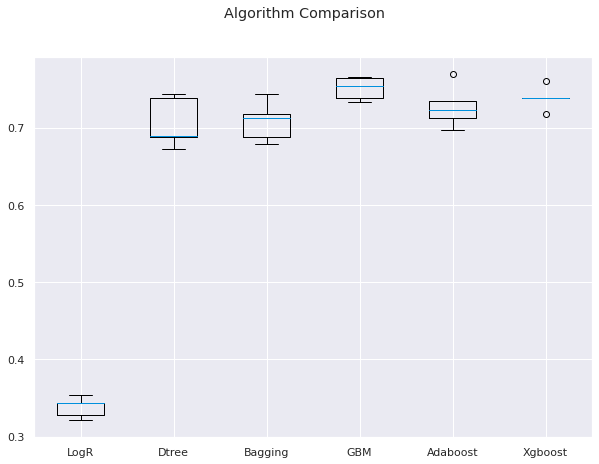

In [88]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()


- All three boosting models seem to be generalizing well but recall performance is still below our target 0.95 recall target
- Scores on validation dataset improved slightly fromt rain indicating underfitting
- We will select Adaboost, GBM, and Xgboost for tuning to see if we can increase these scores 

## Hyperparameter Tuning - RandomSearchCV

- We will tune Adaboost, GBM, and Xgboost using RandomSearchCV and compare the performance of each model.

#### Function to compare performance of each model

In [89]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [90]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Adaboost RandomSearchCV


In [91]:
%%time 

# defining model
model = AdaBoostClassifier(random_state=1)

# Setting number of splits equal to 5
kfold_ran = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
    ) 

# Parameter grid to pass in RandomSearchCV

param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=kfold_ran, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 90, 'learning_rate': 1, 'base_estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')} with CV score=0.8155625327053899:
CPU times: user 2.85 s, sys: 239 ms, total: 3.08 s
Wall time: 57.7 s


In [92]:
# building model with best parameters
adb_tuned2 = AdaBoostClassifier(
    n_estimators=90,
    learning_rate=.1,
    random_state=1,
    base_estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best'),
)

# Fit the model on training data
adb_tuned2.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [93]:
# Calculating different metrics on train set
Adaboost_random_train = model_performance_classification_sklearn(
    adb_tuned2, X_train, y_train
)
print("Training performance:")
Adaboost_random_train

Training performance:


Accuracy  Recall  Precision    F1
0     0.947   0.732      0.922 0.816

In [94]:
# Calculating different metrics on validation set
Adaboost_random_val = model_performance_classification_sklearn(adb_tuned2, X_val, y_val)
print("Validation performance:")
Adaboost_random_val

Validation performance:


Accuracy  Recall  Precision    F1
0     0.943   0.721      0.907 0.803

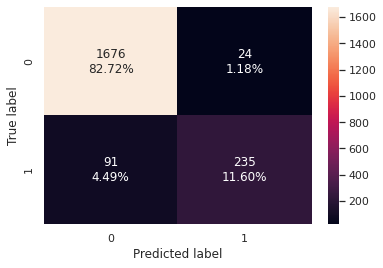

In [95]:
# creating confusion matrix
confusion_matrix_sklearn(adb_tuned2, X_val, y_val)

- Tuning did not improve recall scores
- We are still below the > 0.95 recall target threshold
- False Negatives are 91

### GBM RandomSearchCV

In [96]:
%%time 

# defining model
model = GradientBoostingClassifier(random_state=1)

# Setting number of splits equal to 5
kfold_ran = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
    ) 

# Parameter grid to pass in RandomSearchCV

param_grid = {"learning_rate": [0.01,0.1,0.2,0.05],
                  "subsample"    : [0.8,0.9,1],
                  "n_estimators" : np.arange(50,150,50),
                  "max_depth"    : np.arange(1,5,1)
                 }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=kfold_ran, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.2} with CV score=0.8011983254840397:
CPU times: user 3.42 s, sys: 197 ms, total: 3.62 s
Wall time: 1min 8s


In [97]:
# building model with best parameters
GBM_tuned2 = GradientBoostingClassifier(random_state=1, learning_rate=0.2, max_depth=4, n_estimators=100, subsample=0.8)


# Fit the model on training data
GBM_tuned2.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.2, loss='deviance', max_depth=4,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=0.8, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [98]:
# Calculating different metrics on train set
GBM_random_train = model_performance_classification_sklearn(
    GBM_tuned2, X_train, y_train
)
print("Training performance:")
GBM_random_train

Training performance:


Accuracy  Recall  Precision    F1
0     0.993   0.972      0.985 0.979

In [99]:
# Calculating different metrics on validation set
GBM_random_val = model_performance_classification_sklearn(GBM_tuned2, X_val, y_val)
print("Validation performance:")
GBM_random_val

Validation performance:


Accuracy  Recall  Precision    F1
0     0.963   0.859      0.906 0.882

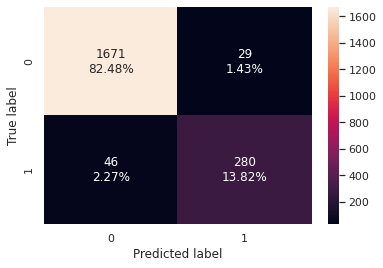

In [100]:
# creating confusion matrix
confusion_matrix_sklearn(GBM_tuned2, X_val, y_val)

- GBM Tuning improved recall scores but there looks to be some overfitting
- We are still below the > 0.95 recall target threshold
- False Negatives are 46 which is better than Adaboost-Tuning

### Xgboost RandomSearchCV

In [101]:
%%time

# defining model
model = XGBClassifier(random_state=1,eval_metric='logloss')

# Setting number of splits equal to 5
kfold_ran = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
    ) 

# Parameter grid to pass in RandomizedSearchCV
param_grid={'n_estimators':np.arange(50,150,50),
            'scale_pos_weight':[2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05],
            'gamma':[0,1,3,5],
            'subsample':[0.8,0.9,1],
            'max_depth':np.arange(1,5,1),
            'reg_lambda':[5,10]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
xgb_tuned2 = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=kfold_ran, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
xgb_tuned2.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(xgb_tuned2.best_params_,xgb_tuned2.best_score_))

Best parameters are {'subsample': 1, 'scale_pos_weight': 10, 'reg_lambda': 10, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 1} with CV score=0.9528676085818943:
CPU times: user 2.27 s, sys: 159 ms, total: 2.43 s
Wall time: 32.8 s


In [102]:
# building model with best parameters
xgb_tuned2 = XGBClassifier(
    random_state=1,
    subsample=1, scale_pos_weight=10, reg_lambda=10, n_estimators=100, max_depth=3, learning_rate=0.05, gamma=1,
)
# Fit the model on training data
xgb_tuned2.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1,
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=1,
              reg_alpha=0, reg_lambda=10, scale_pos_weight=10, seed=None,
              silent=None, subsample=1, verbosity=1)

In [103]:
# Calculating different metrics on train set
xgb_random_train = model_performance_classification_sklearn(
    xgb_tuned2, X_train, y_train
)
print("Training performance:")
xgb_random_train

Training performance:


Accuracy  Recall  Precision    F1
0     0.874   0.981      0.561 0.714

In [104]:
# Calculating different metrics on validation set
xgb_random_val = model_performance_classification_sklearn(xgb_tuned2, X_val, y_val)
print("Validation performance:")
xgb_random_val

Validation performance:


Accuracy  Recall  Precision    F1
0     0.870   0.954      0.556 0.703

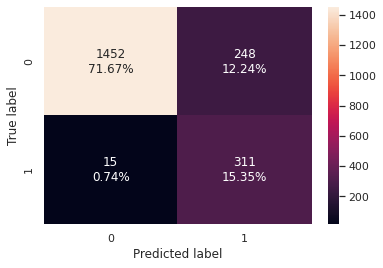

In [105]:
# creating confusion matrix
confusion_matrix_sklearn(xgb_tuned2, X_val, y_val)

- XGBoost with Tuning has signifcantly improced our Recall to 0.954 on the validation set with Accuracy of 0.87 both of which are above our targets
- False Negatives have declined to just 15

### Comparing all Tuned Models



In [106]:
# performance comparison

models_train_comp_df = pd.concat(
    [
        Adaboost_random_train.T,
        Adaboost_random_val.T,
        GBM_random_train.T,
        GBM_random_val.T,
        xgb_random_train.T,
        xgb_random_val.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "AdaBoost Tuned_Train",
    "AdaBoost Tuned_Validate",
    "GBM Tuned_Train",
    "GBM Tuned_Validate",
    "Xgboost Tuned_Train",
    "Xgboost Tuned_Validate",
]
print("Model Performance Comparison:")
models_train_comp_df

Model Performance Comparison:


AdaBoost Tuned_Train  AdaBoost Tuned_Validate  GBM Tuned_Train  \
Accuracy                  0.947                    0.943            0.993   
Recall                    0.732                    0.721            0.972   
Precision                 0.922                    0.907            0.985   
F1                        0.816                    0.803            0.979   

           GBM Tuned_Validate  Xgboost Tuned_Train  Xgboost Tuned_Validate  
Accuracy                0.963                0.874                   0.870  
Recall                  0.859                0.981                   0.954  
Precision               0.906                0.561                   0.556  
F1                      0.882                0.714                   0.703

- Xgboost produced the best Recall of 0.954 on the validation dataset
- GBM had the higehst Accuracy 0.963, Precision 0.906, but Recall of just 0.859


## Oversampling of train data using SMOTE

- We will employ synthetic data upsampling to handle dependent variable class imbalance

In [107]:
print("Before UpSampling, counts of label 'Churn Yes': {}".format(sum(y_train == 1)))
print("Before UpSampling, counts of label 'Churn No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train.ravel())


print("After UpSampling, counts of label 'Churn Yes': {}".format(sum(y_train_over == 1)))
print("After UpSampling, counts of label 'Churn No': {} \n".format(sum(y_train_over == 0)))


print("After UpSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After UpSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before UpSampling, counts of label 'Churn Yes': 976
Before UpSampling, counts of label 'Churn No': 5099 

After UpSampling, counts of label 'Churn Yes': 5099
After UpSampling, counts of label 'Churn No': 5099 

After UpSampling, the shape of train_X: (10198, 34)
After UpSampling, the shape of train_y: (10198,) 



### Fit Adaboost Tuned Model on oversampled test train data

In [108]:
# Fit the model on oversampled training data
adb_tuned2_over = adb_tuned2
adb_tuned2_over.fit(X_train_over, y_train_over)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [109]:
# Calculating different metrics on oversampled training set
Adaboost_random_train_over = model_performance_classification_sklearn(
    adb_tuned2_over, X_train_over, y_train_over
)
print("Adaboost-Tuned Training performance on oversample data:")
Adaboost_random_train_over

Adaboost-Tuned Training performance on oversample data:


Accuracy  Recall  Precision    F1
0     0.969   0.956      0.981 0.968

In [110]:
# Calculating different metrics on validation set
Adaboost_random_val_over = model_performance_classification_sklearn(adb_tuned2_over, X_val, y_val)
print("Adaboost_over Validation performance:")
Adaboost_random_val_over

Adaboost_over Validation performance:


Accuracy  Recall  Precision    F1
0     0.945   0.785      0.859 0.821

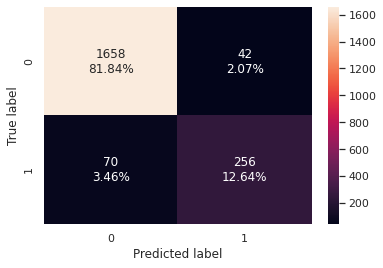

In [111]:
# creating confusion matrix
confusion_matrix_sklearn(adb_tuned2_over, X_val, y_val)

- Oversampling improved the Adaboost tuned model recall score on the validation dataset slightly
- False Negatives declined from 91 to 70

### Fit GBM Tuned Model on oversampled train data

In [112]:

# Fit GBM Tuned model on oversampled training data

GBM_tuned2_over = GBM_tuned2
GBM_tuned2_over.fit(X_train_over, y_train_over)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.2, loss='deviance', max_depth=4,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=0.8, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [113]:
# Calculating different metrics on oversampled training set
GBM_random_train_over = model_performance_classification_sklearn(
    GBM_tuned2_over, X_train_over, y_train_over
)
print("GBM-Tuned Training performance on oversample data:")
GBM_random_train_over

GBM-Tuned Training performance on oversample data:


Accuracy  Recall  Precision    F1
0     0.993   0.992      0.994 0.993

In [114]:
# Calculating different metrics on validation set
GBM_random_val_over = model_performance_classification_sklearn(GBM_tuned2_over, X_val, y_val)
print("GBM_over Validation performance:")
GBM_random_val_over

GBM_over Validation performance:


Accuracy  Recall  Precision    F1
0     0.957   0.862      0.870 0.866

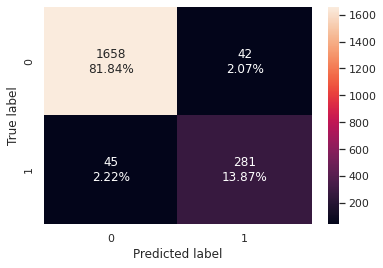

In [115]:
# creating confusion matrix
confusion_matrix_sklearn(GBM_tuned2_over, X_val, y_val)

- Oversampling improved the performance of the GBM model
- Recall on the validation set increased from 0.862 to 0.859
- False-Negatives declined from 46 to 45 

### Fit Xgboost Tuned Model on the oversampled train data


In [116]:
# Fit xgboost Tuned model on oversampled training data
xgb_tuned2_over = xgb_tuned2
xgb_tuned2_over.fit(X_train_over, y_train_over)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1,
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=1,
              reg_alpha=0, reg_lambda=10, scale_pos_weight=10, seed=None,
              silent=None, subsample=1, verbosity=1)

In [117]:
# Calculating different metrics on oversampled training set
xgb_random_train_over = model_performance_classification_sklearn(
    xgb_tuned2_over, X_train_over, y_train_over
)
print("Xgboost-Tuned Training performance on oversample data:")
xgb_random_train_over

Xgboost-Tuned Training performance on oversample data:


Accuracy  Recall  Precision    F1
0     0.857   0.997      0.779 0.875

In [118]:
# Calculating different metrics on validation set
X_val = X_val.values
y_val = y_val.values


xgb_random_val_over = model_performance_classification_sklearn(xgb_tuned2_over, X_val, y_val)
print("Xgboost_over Validation performance:")
xgb_random_val_over


Xgboost_over Validation performance:


Accuracy  Recall  Precision    F1
0     0.748   0.982      0.388 0.557

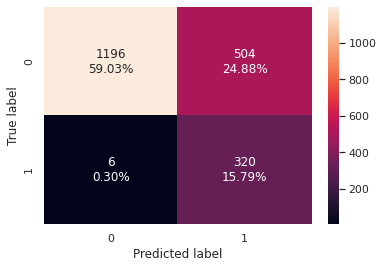

In [119]:
# creating confusion matrix
confusion_matrix_sklearn(xgb_tuned2_over, X_val, y_val)

- Recall is very strong at 0.982
- False negatives are just 6

## Undersampling train data using Random Under Sampler

We will try undersampling to handle variable imbalance

In [120]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [121]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 976
Before Under Sampling, counts of label 'No': 5099 

After Under Sampling, counts of label 'Yes': 976
After Under Sampling, counts of label 'No': 976 

After Under Sampling, the shape of train_X: (1952, 34)
After Under Sampling, the shape of train_y: (1952,) 



### Fit Adaboost Tuned Model on undersampled train data

In [122]:
# Fit the model on undersampled training data
adb_tuned2_un = adb_tuned2
adb_tuned2_un.fit(X_train_un, y_train_un)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [123]:
# Calculating different metrics on undersampled training set
Adaboost_random_train_un = model_performance_classification_sklearn(
    adb_tuned2_un, X_train_un, y_train_un
)
print("Adaboost-Tuned Training performance on udnersample data:")
Adaboost_random_train_un

Adaboost-Tuned Training performance on udnersample data:


Accuracy  Recall  Precision    F1
0     0.945   0.942      0.947 0.945

In [124]:
# Calculating different metrics on undersampled validation set
Adaboost_random_val_un = model_performance_classification_sklearn(adb_tuned2_un, X_val, y_val)
print("Adaboost_under Validation performance:")
Adaboost_random_val_un

Adaboost_under Validation performance:


Accuracy  Recall  Precision    F1
0     0.919   0.939      0.680 0.789

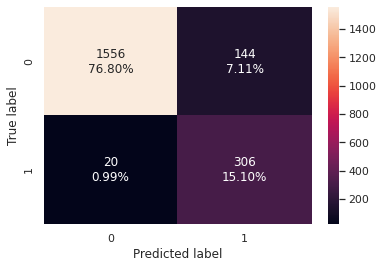

In [125]:
# creating confusion matrix
confusion_matrix_sklearn(adb_tuned2_un, X_val, y_val)

- Compared to the oversampling model, Recall improved from 0.785 to 0.939 and false negatives declined from 75 to 20



### Fit GBM Tuned Model on undersampled train data

In [126]:
# Fit GBM Tuned model on undersampled training data

GBM_tuned2_un = GBM_tuned2
GBM_tuned2_un.fit(X_train_un, y_train_un)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.2, loss='deviance', max_depth=4,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=0.8, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [127]:
# Calculating different metrics on undersampled training set
GBM_random_train_un = model_performance_classification_sklearn(
    GBM_tuned2_un, X_train_un, y_train_un
)
print("GBM-Tuned Training performance on undersample data:")
GBM_random_train_un

GBM-Tuned Training performance on undersample data:


Accuracy  Recall  Precision    F1
0     0.999   1.000      0.998 0.999

In [128]:
# Calculating different metrics on validation set
GBM_random_val_un = model_performance_classification_sklearn(GBM_tuned2_un, X_val, y_val)
print("GBM_over Validation performance:")
GBM_random_val_un

GBM_over Validation performance:


Accuracy  Recall  Precision    F1
0     0.927   0.954      0.702 0.809

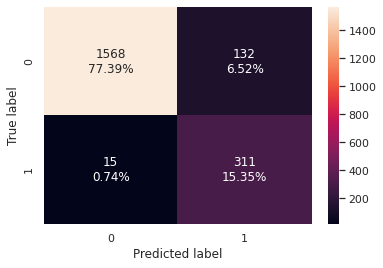

In [129]:
# creating confusion matrix
confusion_matrix_sklearn(GBM_tuned2_un, X_val, y_val)

- Compared to the GBM oversampled model, recall improved from 0862 to 0.954 and false negatives fell from 15 to 45

### Fit Xgboost Tuned Model on undersampled train data

In [130]:
# Fit xgboost Tuned model on undersampled training data

xgb_tuned2_un = xgb_tuned2
xgb_tuned2_un.fit(X_train_un, y_train_un)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1,
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=1,
              reg_alpha=0, reg_lambda=10, scale_pos_weight=10, seed=None,
              silent=None, subsample=1, verbosity=1)

In [131]:
# Calculating different metrics on undersampled training set
xgb_random_train_un = model_performance_classification_sklearn(
    xgb_tuned2_un, X_train_un, y_train_un
)
print("Xgboost-Tuned Training performance on undersample data:")
xgb_random_train_un

Xgboost-Tuned Training performance on undersample data:


Accuracy  Recall  Precision    F1
0     0.808   0.999      0.723 0.839

In [132]:

# Calculating different metrics on validation set
xgb_random_val_un = model_performance_classification_sklearn(xgb_tuned2_un, X_val, y_val)
print("Xgboost_under Validation performance:")
xgb_random_val_un


Xgboost_under Validation performance:


Accuracy  Recall  Precision    F1
0     0.658   0.994      0.319 0.483

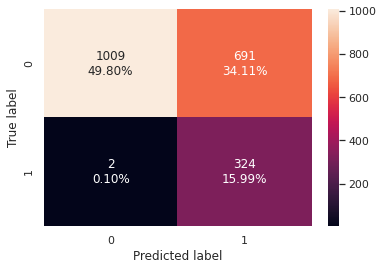

In [133]:
# creating confusion matrix
confusion_matrix_sklearn(xgb_tuned2_un, X_val, y_val)

- Recall improced from oversampling from 0.98 to 0.994 but accuracy declined from 0.748 to 0.658

### Compare all Sampled Models

In [134]:
# performance comparison

models_train_comp_df_samp = pd.concat(
    [
        Adaboost_random_train_over.T, 
     Adaboost_random_val_over.T,
        GBM_random_train_over.T, 
     GBM_random_val_over.T,
        xgb_random_train_over.T, 
     xgb_random_val_over.T,
        Adaboost_random_train_un.T, 
     Adaboost_random_val_un.T,
        GBM_random_train_un.T, 
     GBM_random_val_un.T,
        xgb_random_train_un.T, 
     xgb_random_val_un.T
    ],
    axis=1,
)
models_train_comp_df_samp.columns = [
    "AdaBoost Over_Train", 
    "AdaBoost Over_Validate",
    "GBM Over_Train", 
    "GBM Over_Validate",
    "Xgboost Over_Train", 
    "Xgboost Over_Validate",
    "AdaBoost Under_Train", 
    "AdaBoost Under_Validate",
    "GBM Under_Train", 
    "GBM Under_Validate",
    "Xgboost Under_Train", 
    "Xgboost Under_Validate"
]
print("Sampled Model Performance Comparison:")
models_train_comp_df_samp

Sampled Model Performance Comparison:


AdaBoost Over_Train  AdaBoost Over_Validate  GBM Over_Train  \
Accuracy                 0.969                   0.945           0.993   
Recall                   0.956                   0.785           0.992   
Precision                0.981                   0.859           0.994   
F1                       0.968                   0.821           0.993   

           GBM Over_Validate  Xgboost Over_Train  Xgboost Over_Validate  \
Accuracy               0.957               0.857                  0.748   
Recall                 0.862               0.997                  0.982   
Precision              0.870               0.779                  0.388   
F1                     0.866               0.875                  0.557   

           AdaBoost Under_Train  AdaBoost Under_Validate  GBM Under_Train  \
Accuracy                  0.945                    0.919            0.999   
Recall                    0.942                    0.939            1.000   
Precision                 0.947                    0.680            0.998   
F1                        0.945                    0.789            0.999   

           GBM Under_Validate  Xgboost Under_Train  Xgboost Under_Validate  
Accuracy                0.927                0.808                   0.658  
Recall                  0.954                0.999                   0.994  
Precision               0.702                0.723                   0.319  
F1                      0.809                0.839                   0.483

- Xgboost with oversampling has the best scores on the validation set for both recall 0.982 and for accuracy 0.748 both of which meet our criteria of >0.95 recall, >0.70 accuracy, we would like to have seen higher precision
- However, Xgboost_Tuned from earlier has recall of > 0.95 but accuracy of 0.87 at seem to be our best generalizing model

### Performance on Test Dataset

In [135]:
# Calculating different metrics on the test set
X_test = X_test.values
y_test = y_test.values


xgboost_grid_test = model_performance_classification_sklearn(xgb_tuned2, X_test, y_test)
print("Test performance:")
xgboost_grid_test

Test performance:


Accuracy  Recall  Precision    F1
0     0.658   0.991      0.318 0.482

### Important Feature Names

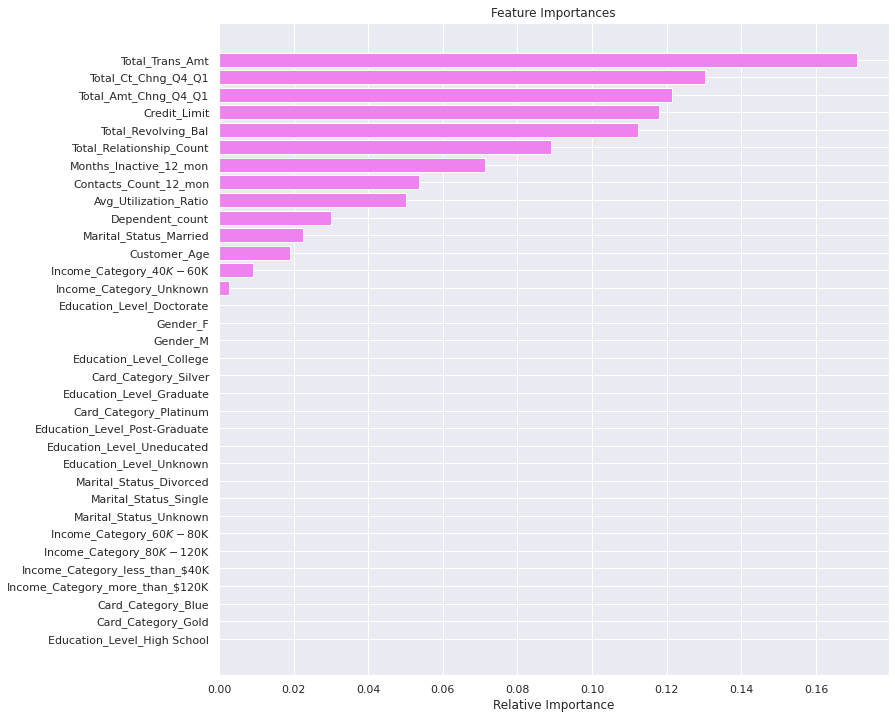

In [136]:
feature_names = X.columns
importances = xgb_tuned2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- High total transaction amounts and changes in transaction counts and amounts from Q4 to Q1 are strong indicators for churn
- Credit Limit and Total Revolving Balance are also s which contribute to churn

## Create Pipeline to Productionize the Model

- Using pipeline to put final model into production

## Column Transformer
- We know that we can use pipelines to standardize the model building, but the steps in a pipeline are applied to each and every variable - how can we personalize the pipeline to perform different processing on different columns
- Column transformer allows different columns or column subsets of the input to be transformed separately and the features generated by each transformer will be concatenated to form a single feature space. This is useful for heterogeneous or columnar data, to combine several feature extraction mechanisms or transformations into a single transformer.

- We will create 2 different pipelines, one for numerical columns and one for categorical columns
- For numerical columns, we will do missing value imputation as pre-processing
- For categorical columns, we will do one hot encoding and missing value imputation as pre-processing

In [137]:
data1.select_dtypes(include=np.number).columns.tolist()

['Customer_Age',
 'Dependent_count',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'CC_Churn']

In [138]:
# creating a list of numerical variables
numerical_features = ['Customer_Age',
 'Dependent_count',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',]

# creating a transformer for numerical variables, which will apply simple imputer on the numerical variables
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median"))])

# creating a list of categorical variables
categorical_features = ["Gender",'Education_Level', 'Marital_Status','Income_Category','Card_Category']

# creating a transformer for categorical variables, which will first apply simple imputer and 
#then do one hot encoding for categorical variables
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)
# handle_unknown = "ignore", allows model to handle any unknown category in the test data

# combining categorical transformer and numerical transformer using a column transformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder="passthrough",
)
# remainder = "passthrough" has been used, it will allow variables that are present in original data 
# but not in "numerical_columns" and "categorical_columns" to pass through the column transformer without any changes


In [139]:
# Separating target variable and other variables
X = data1.drop(['CC_Churn'], axis=1)
y = data1['CC_Churn']

In [140]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1, stratify=y
)
print(X_train.shape, X_test.shape)

(7088, 16) (3039, 16)


In [141]:
print(y_train.shape, y_test.shape)

(7088,) (3039,)


In [142]:
# Creating new pipeline with best parameters
model = Pipeline(
    steps=[
        ("pre", preprocessor),
        (
            "XGB",
            XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1,
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=1,
              reg_alpha=0, reg_lambda=10, scale_pos_weight=10, seed=None,
              silent=None, subsample=1, verbosity=1),
        ),
    ]
)
# Fit the model on training data
model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('pre',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                               